In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'data\used_car_sample.csv')

In [4]:
df.shape

(433836, 29)

In [5]:
df.head()

,vin,back_legroom (in),body_type,city_fuel_economy,daysonmarket,dealer_zip,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),...,mileage,model_name,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),width (in),year,actual_price
0,112D3DAS3E2R3EDF2,NaN,sedan,NaN,5,60007.0,4.0,black,NaN,NaN,...,92599.0,elantra,4.250000,NaN,automatic,NaN,NaN,NaN,2013-01-01,11490.0
1,19UDE2F30JA006460,34.0,sedan,25.0,56,39180.0,4.0,silver,42.3,13.2,...,14361.0,ilx,4.000000,3600.0,automatic,fwd,105.1,70.6,2018-01-01,26672.0
2,19UDE2F30LA009023,34.0,sedan,24.0,41,33062.0,4.0,black,42.3,13.2,...,3.0,ilx,4.444444,3600.0,dual clutch,fwd,105.1,70.6,2020-01-01,26345.0
3,19UDE2F30LA010690,34.0,sedan,24.0,0,63011.0,4.0,red,42.3,13.2,...,1.0,ilx,4.735294,3600.0,dual clutch,fwd,105.1,70.6,2020-01-01,27325.0
4,19UDE2F31HA007451,34.0,sedan,25.0,60,1752.0,4.0,white,42.3,13.2,...,38896.0,ilx,4.291667,3600.0,dual clutch,fwd,105.1,70.6,2017-01-01,18122.0


In [6]:
df.columns

Index(['vin', 'back_legroom (in)', 'body_type', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'num_of_cylinders',
       'exterior_color_grouped', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'fuel_type', 'height (in)',
       'highway_fuel_economy', 'horsepower', 'interior_color_grouped',
       'length (in)', 'major_options_count', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'seller_rating', 'torque (rpm)',
       'transmission', 'wheel_system', 'wheelbase (in)', 'width (in)', 'year',
       'actual_price'],
      dtype='object')

In [7]:
df.isnull().sum() * 100 / len(df) # percentage of missing values

vin                           0.000000
back_legroom (in)             5.077956
body_type                     0.465844
city_fuel_economy            15.296564
daysonmarket                  0.000000
dealer_zip                    0.008298
num_of_cylinders              3.081810
exterior_color_grouped        0.000000
front_legroom (in)            5.077956
fuel_tank_volume (gallon)     5.077956
fuel_type                     2.280124
height (in)                   5.077956
highway_fuel_economy         15.296564
horsepower                    5.775224
interior_color_grouped        0.000000
length (in)                   5.078186
major_options_count           5.232853
make_name                     0.000000
maximum_seating               5.077956
mileage                       5.631621
model_name                    0.000000
seller_rating                 1.118164
torque (rpm)                 17.616795
transmission                  1.221199
wheel_system                  4.742806
wheelbase (in)           

We observe that a lot of features have missing values. We will have to deal with them later.

In [8]:
df.dtypes

vin                           object
back_legroom (in)            float64
body_type                     object
city_fuel_economy            float64
daysonmarket                   int64
dealer_zip                   float64
num_of_cylinders             float64
exterior_color_grouped        object
front_legroom (in)           float64
fuel_tank_volume (gallon)    float64
fuel_type                     object
height (in)                  float64
highway_fuel_economy         float64
horsepower                   float64
interior_color_grouped        object
length (in)                  float64
major_options_count          float64
make_name                     object
maximum_seating              float64
mileage                      float64
model_name                    object
seller_rating                float64
torque (rpm)                 float64
transmission                  object
wheel_system                  object
wheelbase (in)               float64
width (in)                   float64
y

'dealer_zip' is a numerical feature here. We need to convert it to a categorical feature.

In [9]:
df['dealer_zip'].head()

0    60007.0
1    39180.0
2    33062.0
3    63011.0
4     1752.0
Name: dealer_zip, dtype: float64

In [10]:
df['dealer_zip'] = df['dealer_zip'].astype(str)

In [11]:
df['dealer_zip'].head()

0    60007.0
1    39180.0
2    33062.0
3    63011.0
4     1752.0
Name: dealer_zip, dtype: object

In [12]:
df['dealer_zip'] = df['dealer_zip'].str.strip().str.replace('.0', '', regex=False)

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['vin', 'body_type', 'dealer_zip', 'exterior_color_grouped', 'fuel_type',
       'interior_color_grouped', 'make_name', 'model_name', 'transmission',
       'wheel_system', 'year'],
      dtype='object')

In [14]:
numerical_cols = df.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['back_legroom (in)', 'city_fuel_economy', 'daysonmarket',
       'num_of_cylinders', 'front_legroom (in)', 'fuel_tank_volume (gallon)',
       'height (in)', 'highway_fuel_economy', 'horsepower', 'length (in)',
       'major_options_count', 'maximum_seating', 'mileage', 'seller_rating',
       'torque (rpm)', 'wheelbase (in)', 'width (in)', 'actual_price'],
      dtype='object')

## Univariate Analysis

In [16]:
df[numerical_cols].describe()

,back_legroom (in),city_fuel_economy,daysonmarket,num_of_cylinders,front_legroom (in),fuel_tank_volume (gallon),height (in),highway_fuel_economy,horsepower,length (in),major_options_count,maximum_seating,mileage,seller_rating,torque (rpm),wheelbase (in),width (in),actual_price
count,411806.000000,367474.000000,433836.000000,420466.000000,411806.000000,411806.000000,411806.000000,367474.000000,408781.000000,411805.000000,411134.000000,411806.000000,409404.000000,428985.000000,357408.000000,411806.000000,411806.000000,4.338360e+05
mean,38.027702,23.070283,79.223856,5.037844,42.185746,18.446827,65.800035,29.757956,245.907789,193.285617,6.323661,5.479923,24965.263205,4.269411,3422.764093,115.344777,78.377969,3.139075e+04
std,3.201420,9.465562,106.215284,1.447479,1.428884,5.459216,7.068844,8.194704,90.805463,20.731930,3.565715,0.983317,41905.988991,0.504787,1291.728344,14.934682,7.680786,1.739026e+04
min,0.000000,8.000000,0.000000,2.000000,35.800000,1.900000,50.000000,11.000000,55.000000,120.100000,1.000000,2.000000,0.000000,1.000000,200.000000,78.700000,62.600000,5.000000e+02
25%,35.800000,18.000000,15.000000,4.000000,41.000000,14.500000,58.100000,25.000000,173.000000,180.900000,4.000000,5.000000,5.000000,4.000000,2000.000000,106.300000,72.400000,2.032500e+04
50%,38.200000,22.000000,37.000000,4.000000,41.800000,17.200000,66.100000,29.000000,237.000000,189.500000,6.000000,5.000000,19.000000,4.340426,4000.000000,111.000000,77.300000,2.793500e+04
75%,39.900000,26.000000,89.000000,6.000000,43.000000,21.100000,70.100000,33.000000,300.000000,199.400000,9.000000,6.000000,34854.000000,4.600000,4400.000000,118.400000,83.100000,3.992500e+04
max,49.000000,127.000000,2323.000000,12.000000,52.500000,63.500000,117.600000,127.000000,808.000000,285.900000,52.000000,15.000000,610288.000000,5.000000,7500.000000,200.000000,105.900000,2.175000e+06


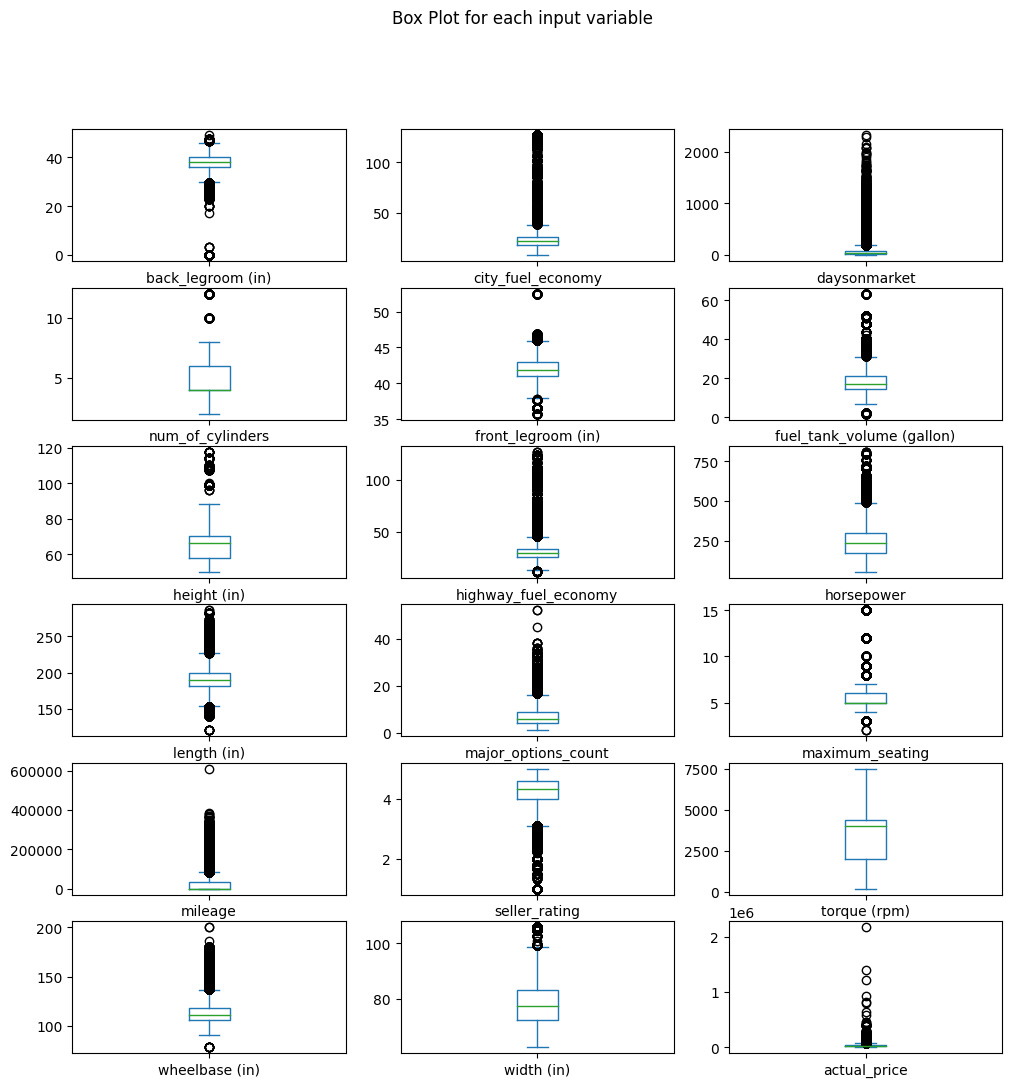

In [17]:
df[numerical_cols].plot(kind='box', subplots=True, layout=(6,3), sharex=False, sharey=False, figsize=(12,12), title='Box Plot for each input variable')
plt.show()

Most of the variables have skew distribution. We need to check if they are outliers or not. If not, we can perform log transformation to make them more normal. Also, we can bucketize some of the variables like 'seller rating' to make them more meaningful.

In [18]:
df[categorical_cols].describe()

,vin,body_type,dealer_zip,exterior_color_grouped,fuel_type,interior_color_grouped,make_name,model_name,transmission,wheel_system,year
count,433836,431815,433836,433836,423944,433836,433836,433836,428538,413260,433836
unique,433836,9,7368,13,8,13,63,913,4,5,22
top,112D3DAS3E2R3EDF2,suv,33619,white,gasoline,black,ford,f-150,automatic,fwd,2020-01-01
freq,1,213474,943,115679,381170,304225,67386,20479,350584,177783,226783


'vin' and 'dealer_zip' have high cardinality. 'vin' is a unique identifier for each car, so it is not useful for our analysis. 'dealer_zip' is a categorical variable, so we will find the region corresponding to each zipcode to reduce the cardinality. 'make_name' and 'model_name' have high cardinality as well. We will have to find a way to deal with their high cardinality.

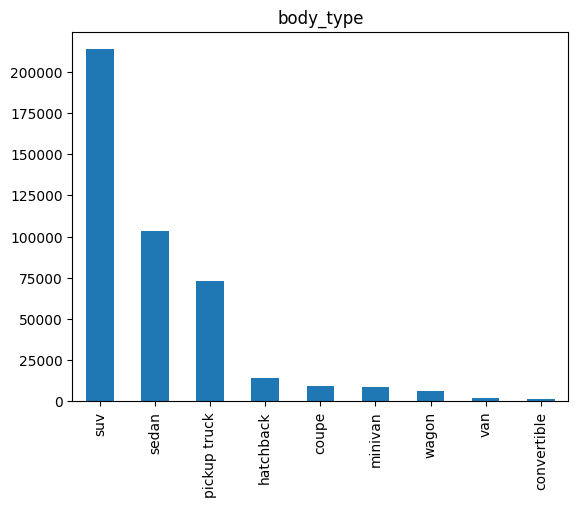

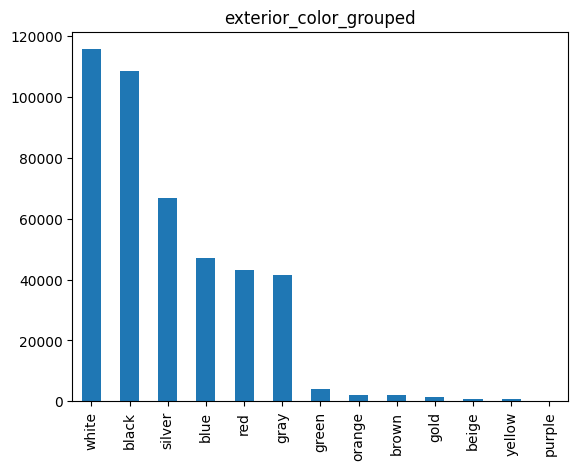

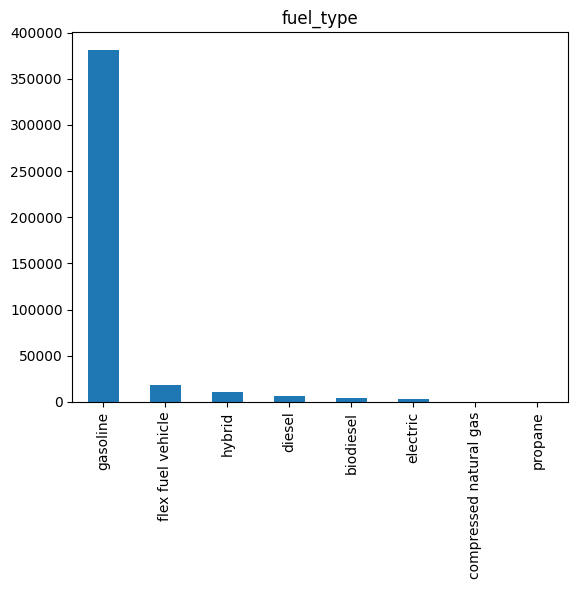

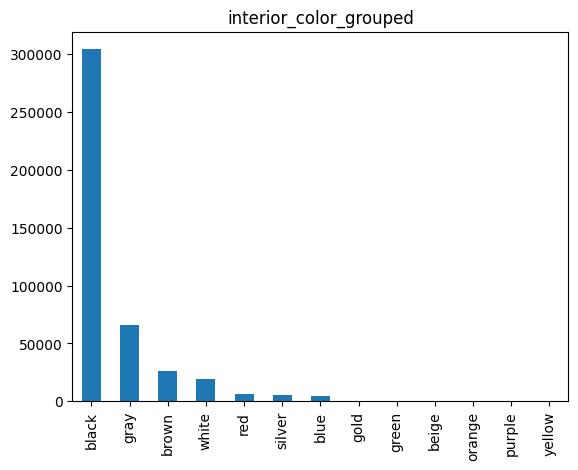

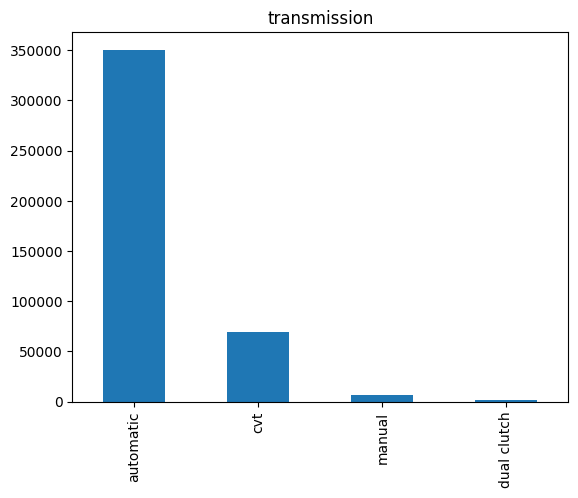

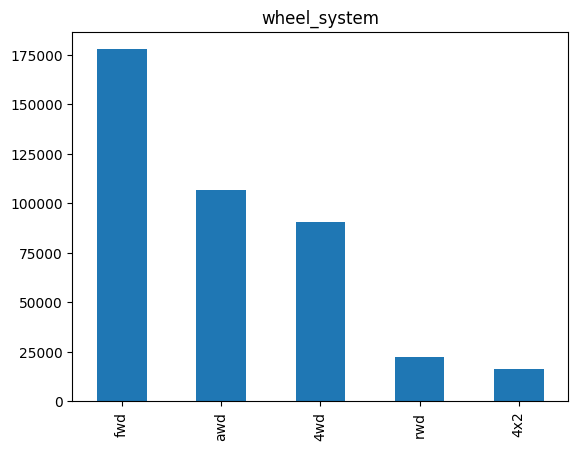

In [19]:
## value-count plot for categorical variables
for col in categorical_cols:
    if df[col].nunique() < 20: # only plot if number of unique values is less than 10
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()

We observe that 'fuel_type', 'interior_color_grouped', 'transmission' have low entropy. We can think about dropping them.

## Bi-variate Analysis

In [20]:
df[numerical_cols].corr()['actual_price'].sort_values(ascending=False)

actual_price                 1.000000
horsepower                   0.666392
fuel_tank_volume (gallon)    0.499906
width (in)                   0.490714
length (in)                  0.490065
wheelbase (in)               0.489654
num_of_cylinders             0.459253
height (in)                  0.445019
major_options_count          0.393145
back_legroom (in)            0.329522
maximum_seating              0.268453
front_legroom (in)           0.100184
daysonmarket                 0.068265
seller_rating                0.064988
torque (rpm)                -0.136192
city_fuel_economy           -0.204027
highway_fuel_economy        -0.286247
mileage                     -0.447366
Name: actual_price, dtype: float64

As we can observe, the numerical features in their current form are not highly correlated with the target variable. It may be because of the highly skewed distribution of some numerical features. We can try transforming the features to improve correlation with the target variable.

<Axes: >

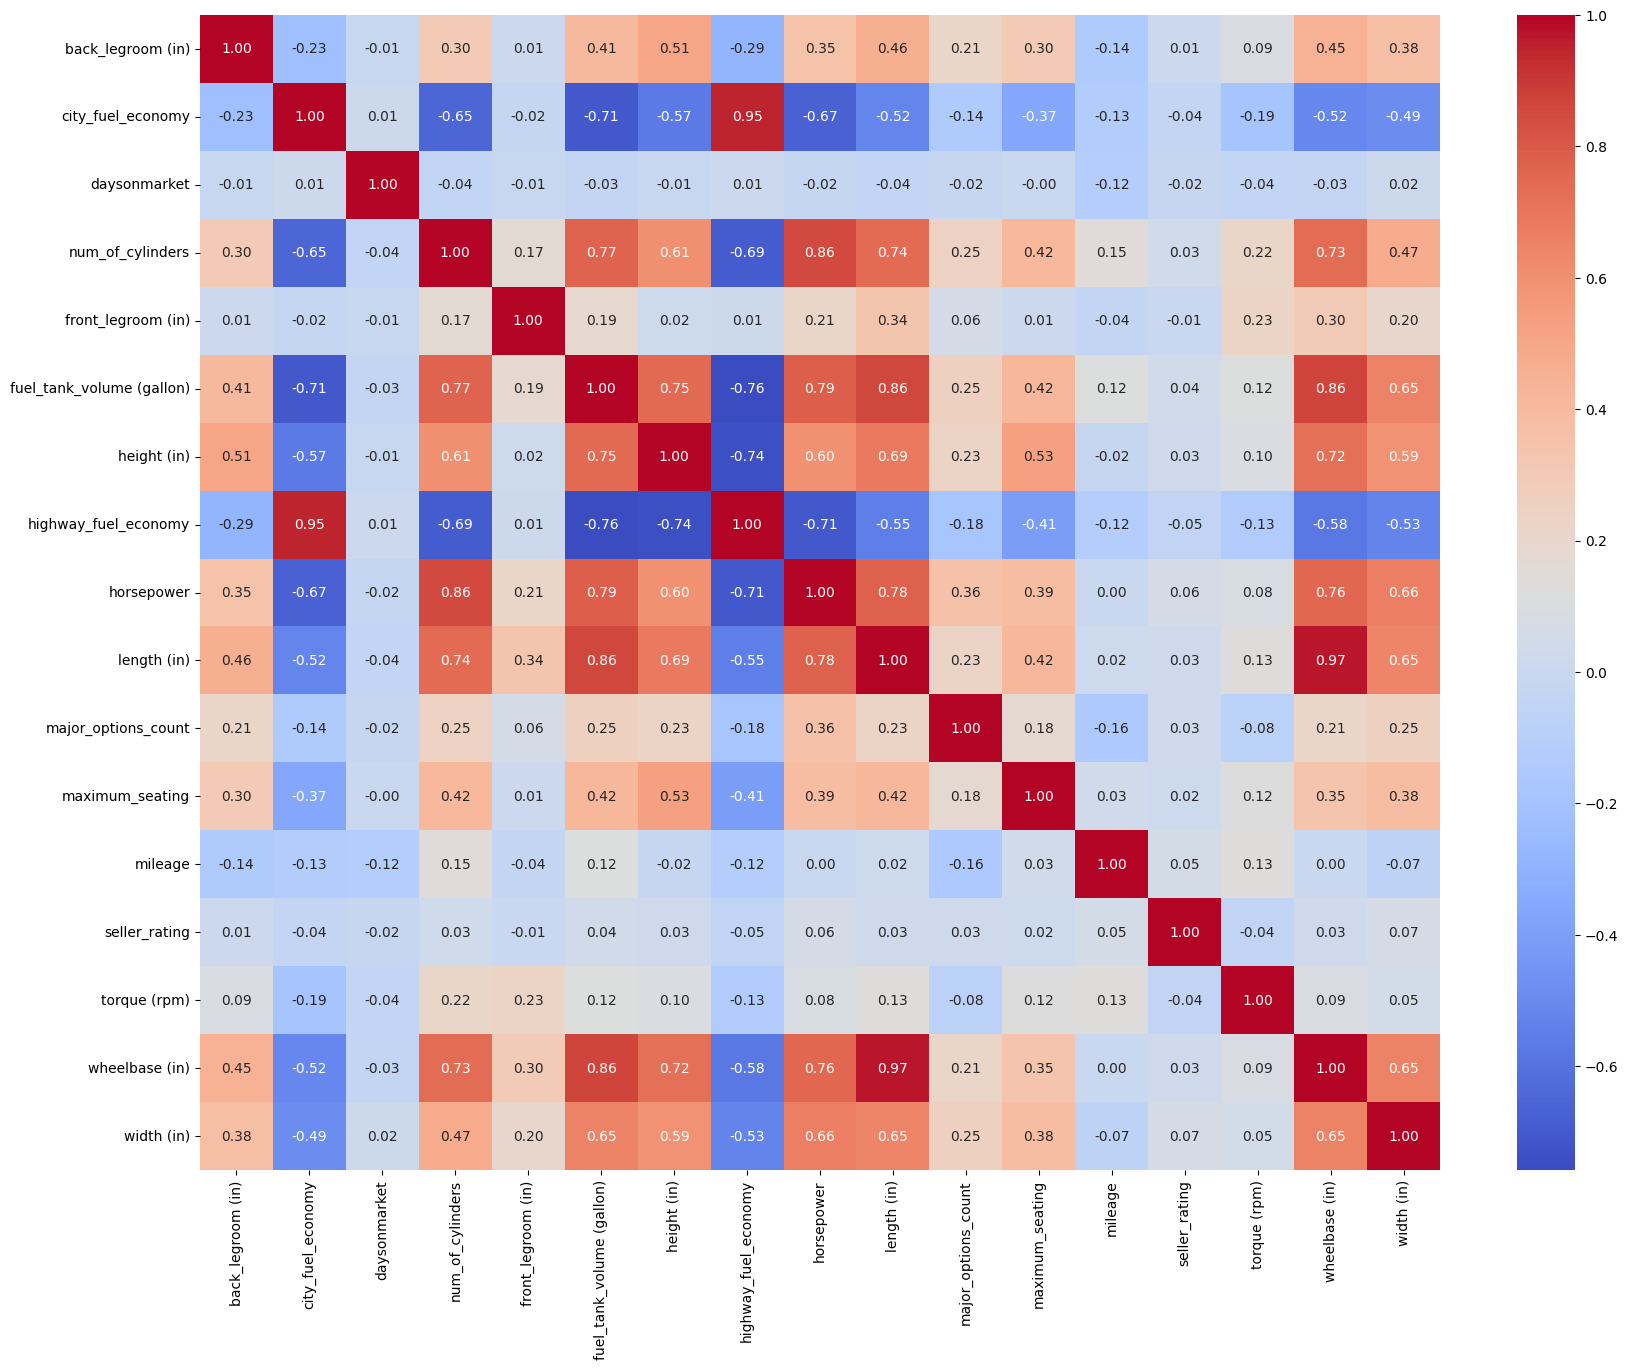

In [21]:
numerical_cols_except_target = numerical_cols.drop('actual_price')
plt.subplots(figsize=(20,15))
sns.heatmap(df[numerical_cols_except_target].corr(), annot=True, fmt=".2f", cmap="coolwarm")

We can observe that there is a high correlation between city_fuel_economy, highway_fuel_economy, fuel_tank_volume, number_of_cylinders, horsepower, wheelbase, width, length, and height. They may contain redundant information, and thus we may not need all of these features to predict the price. Removing some features or combining multiple features into one feature may help us to reduce the complexity of the model.

In [22]:
categorical_cols = categorical_cols.drop(['vin','dealer_zip'])

In [23]:
import scipy.stats as stats

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), columns=categorical_cols, index=categorical_cols)

# Calculate the correlation between each pair of categorical variables
for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        if i != j:
            contingency_table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
            chi2, _, _, _ = stats.chi2_contingency(contingency_table)
            correlation_matrix.iloc[i, j] = np.sqrt(chi2 / (chi2 + df.shape[0]))
        else:
            correlation_matrix.iloc[i, j] = 1.0

<Axes: >

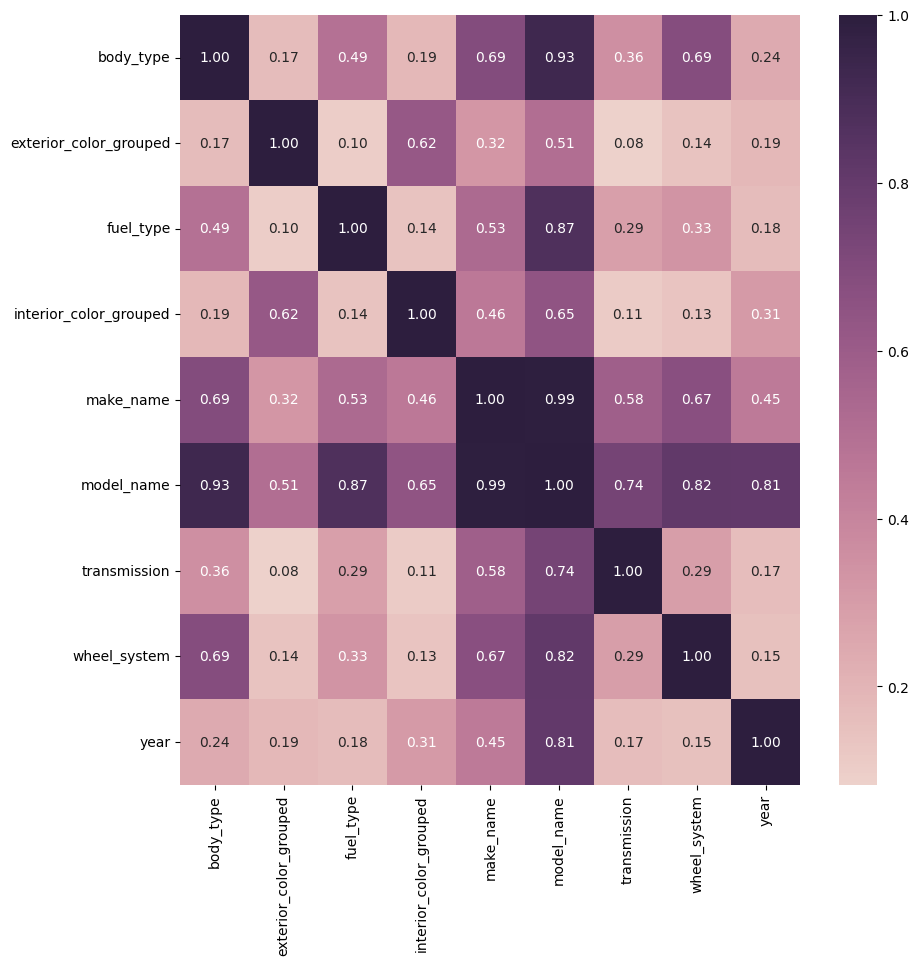

In [24]:
# Print the correlation matrix
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))

We can observe that 'make_name' and 'model_name' are highly correlated to each other. So, we can drop one of them. Almost all other categorical features are correlated to model name. However, in test environment, we may encounter model name which is not present in the dataset. Thus, it makes sense to build the model without considering model name as a feature. So, we can drop model name.

In [25]:
# Select the categorical columns and the target variable
target_variable = 'actual_price'  # Replace 'target' with the actual column name of your target variable

# Perform ANOVA for each categorical feature
for categorical_column in categorical_cols:
    groups = df.groupby(categorical_column)[target_variable].apply(list)
    f_value, p_value = stats.f_oneway(*groups)
    print(f"ANOVA results for {categorical_column}:")
    print(f"  F-value: {f_value}")
    print(f"  p-value: {p_value}\n")

ANOVA results for body_type:
  F-value: 8883.5572479621
  p-value: 0.0

ANOVA results for exterior_color_grouped:
  F-value: 628.2907164669919
  p-value: 0.0

ANOVA results for fuel_type:
  F-value: 3037.269491401929
  p-value: 0.0

ANOVA results for interior_color_grouped:
  F-value: 1112.9465927609897
  p-value: 0.0

ANOVA results for make_name:
  F-value: 2268.0296866011668
  p-value: 0.0

ANOVA results for model_name:
  F-value: 713.2770024542598
  p-value: 0.0

ANOVA results for transmission:
  F-value: 5348.7830932862635
  p-value: 0.0

ANOVA results for wheel_system:
  F-value: 29216.37486681276
  p-value: 0.0

ANOVA results for year:
  F-value: 5899.9977413287315
  p-value: 0.0



The p-value for each categorical variable is less than 0.05, so we can say that the categorical variables have a statistically significant relationship with the target variable.

## Contextual Analysis

<Axes: xlabel='year'>

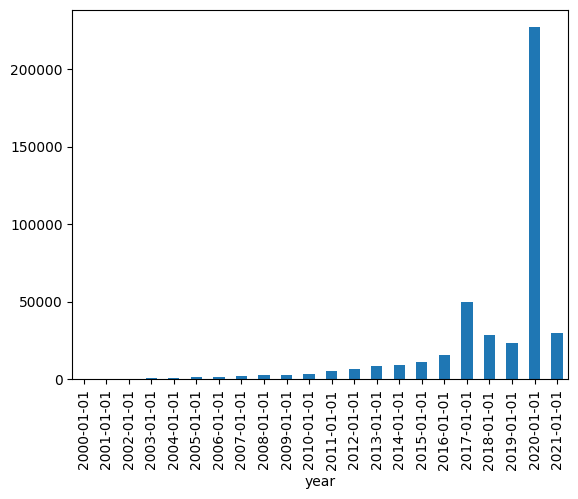

In [26]:
df.groupby(['year']).size().plot(kind='bar')

## Initial cleaning

In [27]:
df.duplicated().sum()

0

In [28]:
is_half_empty = (df.isnull().sum(axis=1) / (df.shape[1] - 1)) >= 0.5
is_half_empty.sum()

10034

In [29]:
half_empty_entries = df[is_half_empty].index
df.drop(half_empty_entries, axis=0, inplace=True)

In [30]:
df.head()

,vin,back_legroom (in),body_type,city_fuel_economy,daysonmarket,dealer_zip,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),...,mileage,model_name,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),width (in),year,actual_price
1,19UDE2F30JA006460,34.0,sedan,25.0,56,39180,4.0,silver,42.3,13.2,...,14361.0,ilx,4.000000,3600.0,automatic,fwd,105.1,70.6,2018-01-01,26672.0
2,19UDE2F30LA009023,34.0,sedan,24.0,41,33062,4.0,black,42.3,13.2,...,3.0,ilx,4.444444,3600.0,dual clutch,fwd,105.1,70.6,2020-01-01,26345.0
3,19UDE2F30LA010690,34.0,sedan,24.0,0,63011,4.0,red,42.3,13.2,...,1.0,ilx,4.735294,3600.0,dual clutch,fwd,105.1,70.6,2020-01-01,27325.0
4,19UDE2F31HA007451,34.0,sedan,25.0,60,1752,4.0,white,42.3,13.2,...,38896.0,ilx,4.291667,3600.0,dual clutch,fwd,105.1,70.6,2017-01-01,18122.0
5,19UDE2F32GA024869,34.0,sedan,NaN,14,90006,4.0,white,42.3,13.2,...,71908.0,ilx,4.000000,3600.0,automatic,fwd,105.1,70.6,2016-01-01,15810.0


In [31]:
df['year'] = pd.to_datetime(df['year']).dt.year

In [32]:
df['model_name'] = df['model_name'].str.lower()

In [33]:
df['model_name'].nunique()

874

In [34]:
df.head()

,vin,back_legroom (in),body_type,city_fuel_economy,daysonmarket,dealer_zip,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),...,mileage,model_name,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),width (in),year,actual_price
1,19UDE2F30JA006460,34.0,sedan,25.0,56,39180,4.0,silver,42.3,13.2,...,14361.0,ilx,4.000000,3600.0,automatic,fwd,105.1,70.6,2018,26672.0
2,19UDE2F30LA009023,34.0,sedan,24.0,41,33062,4.0,black,42.3,13.2,...,3.0,ilx,4.444444,3600.0,dual clutch,fwd,105.1,70.6,2020,26345.0
3,19UDE2F30LA010690,34.0,sedan,24.0,0,63011,4.0,red,42.3,13.2,...,1.0,ilx,4.735294,3600.0,dual clutch,fwd,105.1,70.6,2020,27325.0
4,19UDE2F31HA007451,34.0,sedan,25.0,60,1752,4.0,white,42.3,13.2,...,38896.0,ilx,4.291667,3600.0,dual clutch,fwd,105.1,70.6,2017,18122.0
5,19UDE2F32GA024869,34.0,sedan,NaN,14,90006,4.0,white,42.3,13.2,...,71908.0,ilx,4.000000,3600.0,automatic,fwd,105.1,70.6,2016,15810.0


## Train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop('actual_price', axis=1)
Y = df['actual_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=df['year'])
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['year'])

In [36]:
X_train.shape

(271232, 28)

In [37]:
X_test.shape

(84761, 28)

In [38]:
X_val.shape

(67809, 28)

<Axes: xlabel='year'>

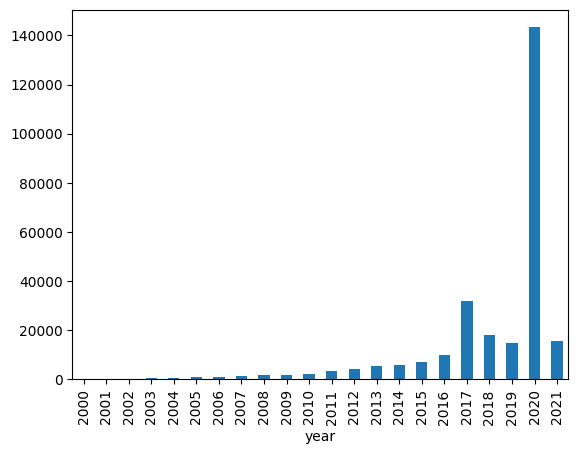

In [39]:
X_train.groupby('year').size().plot(kind='bar')

<Axes: xlabel='year'>

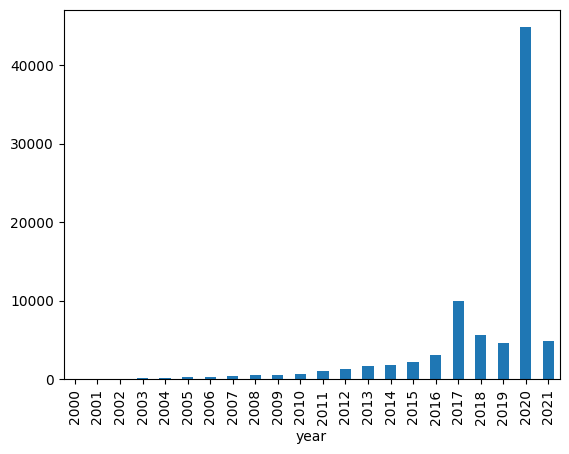

In [40]:
X_test.groupby('year').size().plot(kind='bar')

<Axes: xlabel='year'>

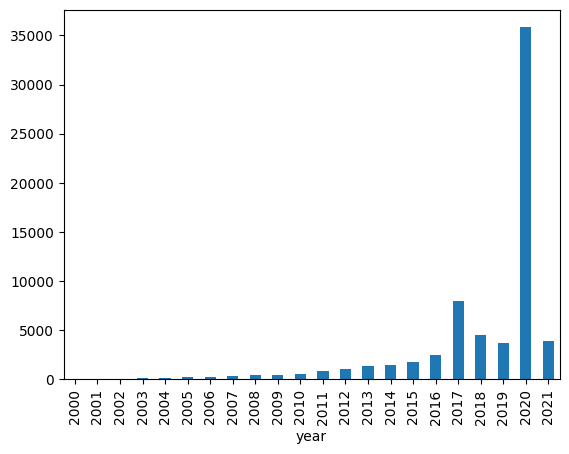

In [41]:
X_val.groupby('year').size().plot(kind='bar')

For cleaning purpose, let's combine X_train and Y_train into a single dataframe. We will split them again after cleaning. Same goes for X_test and Y_test.

In [42]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_test = pd.concat([X_test, Y_test], axis=1)
df_val = pd.concat([X_val, Y_val], axis=1)

In [43]:
df_train.head()

,vin,back_legroom (in),body_type,city_fuel_economy,daysonmarket,dealer_zip,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),...,mileage,model_name,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),width (in),year,actual_price
236930,JTEZU5JR8L5224867,32.9,suv,16.0,10,77373,6.0,blue,41.7,23.0,...,4.0,4runner,4.416667,4400.0,automatic,4x2,109.8,75.8,2020,43497.0
381899,19UUB2F47LA006167,34.5,sedan,20.0,47,34104,6.0,white,42.6,17.2,...,0.0,tlx,4.500000,4500.0,automatic,fwd,109.3,73.0,2020,41125.0
102878,WBA5U7C08LA232243,35.2,sedan,22.0,54,75024,6.0,white,42.0,15.6,...,14529.0,3 series,4.692308,1800.0,automatic,rwd,112.2,81.4,2020,49260.0
68170,WBA5R1C57KAK11439,35.2,sedan,26.0,296,94901,4.0,silver,42.0,15.6,...,5359.0,3 series,4.482759,1450.0,automatic,rwd,112.2,81.4,2019,37204.0
130818,JF2SJAGC1JH590936,38.0,suv,NaN,20,7840,4.0,silver,43.0,15.9,...,18066.0,forester,2.500000,4100.0,cvt,awd,103.9,80.5,2018,25411.0


In [44]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [45]:
df_train.columns

Index(['vin', 'back_legroom (in)', 'body_type', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'num_of_cylinders',
       'exterior_color_grouped', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'fuel_type', 'height (in)',
       'highway_fuel_economy', 'horsepower', 'interior_color_grouped',
       'length (in)', 'major_options_count', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'seller_rating', 'torque (rpm)',
       'transmission', 'wheel_system', 'wheelbase (in)', 'width (in)', 'year',
       'actual_price'],
      dtype='object')

# Feature Engineering

In [46]:
# Fill the null values of 'col' based on 'by' column using 'filler'.
def fill(row, col, by, filler):
    if pd.isnull(row[col]):
        try:
          idx = [row[i] for i in by]
          return filler[tuple(idx)] if len(idx) > 1 else filler[row[by[0]]]
        except KeyError:
          return np.nan
    else:
        return row[col]

In [47]:
def find_mode(column):
    most_frequent_value = pd.Series.mode(column)
    if most_frequent_value.empty: # If there is no mode, return 'unknown'.
        return np.nan
    else:
        return most_frequent_value[0]

## back_legroom

In [48]:
# checking for the total amount of null values as a percentage.
percentage = df_train['back_legroom (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 2.83%.


In [49]:
median_backlegroom_model = df_train.groupby('model_name')['back_legroom (in)'].median()
median_backlegroom_model[median_backlegroom_model.isnull()]

model_name
4500 chassis               NaN
500e                       NaN
5500 chassis               NaN
570s                       NaN
911                        NaN
b-class                    NaN
bolt ev                    NaN
boxster                    NaN
c/k 3500 series            NaN
clarity fuel cell          NaN
corvette                   NaN
cr-z                       NaN
e-golf                     NaN
e-tron                     NaN
econoline wagon            NaN
express cargo              NaN
f-450 super duty chassis   NaN
f-550 super duty chassis   NaN
f-type                     NaN
f430                       NaN
focus electric             NaN
fortwo electric drive      NaN
g20                        NaN
i-miev                     NaN
i-pace                     NaN
ioniq electric             NaN
kona electric              NaN
leaf                       NaN
metris cargo               NaN
mirai                      NaN
model 3                    NaN
model s                    N

In [50]:
df_train['back_legroom (in)'] = df_train.apply(lambda x: fill(x, 'back_legroom (in)', ['model_name'], median_backlegroom_model), axis=1)

In [51]:
df_train['back_legroom (in)'].isnull().sum() * 100 / len(df_train)

0.8406087777253421

In [52]:
df_test['back_legroom (in)'] = df_test.apply(lambda x: fill(x, 'back_legroom (in)', ['model_name'], median_backlegroom_model), axis=1)
df_val['back_legroom (in)'] = df_val.apply(lambda x: fill(x, 'back_legroom (in)', ['model_name'], median_backlegroom_model), axis=1)

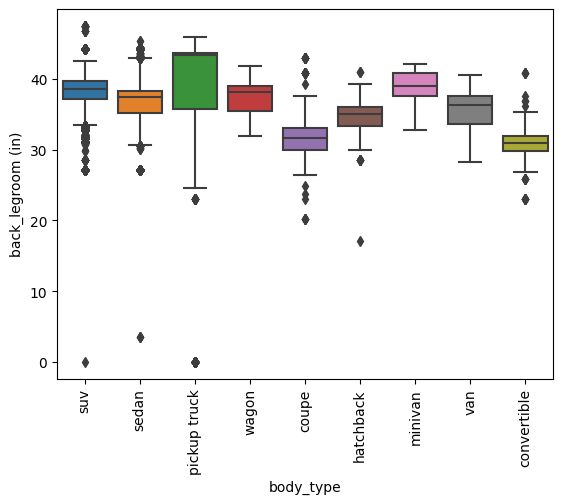

In [53]:
ax = sns.boxplot(x='body_type', y='back_legroom (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [54]:
df_train.loc[df_train['back_legroom (in)'].isnull(), 'body_type'].value_counts()

hatchback       790
wagon           573
suv             336
van             255
sedan           251
pickup truck     42
coupe            16
convertible      14
minivan           3
Name: body_type, dtype: int64

In [55]:
median_backlegroom_body = df_train.groupby('body_type')['back_legroom (in)'].median()
median_backlegroom_body[median_backlegroom_body.isnull()]

Series([], Name: back_legroom (in), dtype: float64)

In [56]:
df_train['back_legroom (in)'] = df_train.apply(lambda x: fill(x, 'back_legroom (in)', ['body_type'], median_backlegroom_body), axis=1)
df_test['back_legroom (in)'] = df_test.apply(lambda x: fill(x, 'back_legroom (in)', ['body_type'], median_backlegroom_body), axis=1)
df_val['back_legroom (in)'] = df_val.apply(lambda x: fill(x, 'back_legroom (in)', ['body_type'], median_backlegroom_body), axis=1)

In [57]:
df_train['back_legroom (in)'].isnull().sum()

0

In [58]:
df_test['back_legroom (in)'].isnull().sum()

0

In [59]:
df_val['back_legroom (in)'].isnull().sum()

0

Now, let's check the distribution of data in this column

<Axes: >

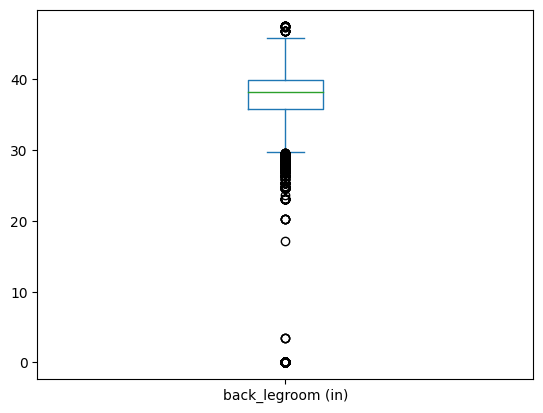

In [60]:
# Check the boxplot of the back_legroom column.
df_train['back_legroom (in)'].plot(kind='box')

The results show that most of the vehicles have a back legroom of ~38 inches. We can also see that there are outliers present in the column. The distribution is left-skewed because of some vehicles having less than 10 inch space for back legroom. Let's take a closer look at these outliers. This could be because they are vehicles that do not have a back seat. Let's take a look at the body type of these vehicles, to see if this is the case.

In [61]:
backlegroom_less_than_10 = df_train.loc[df_train['back_legroom (in)'] < 10, ['body_type', 'maximum_seating']]
pd.crosstab(index=backlegroom_less_than_10['body_type'], columns=backlegroom_less_than_10['maximum_seating']) # This is a crosstab of the body_type and maximum_seating columns.

maximum_seating,3.0,4.0,5.0
body_type,,,
pickup truck,149,0,3
sedan,0,0,3
suv,0,1,0


As expected, most of the outliers are the vehicles with no back seats and therefore no back legroom, such as a pickup truck. But there are also a few vehicles that have a back seat, but no back legroom. Let's take a look at these vehicles.

In [62]:
df_train.loc[backlegroom_less_than_10[backlegroom_less_than_10['body_type'] != 'pickup truck'].index, ['body_type','maximum_seating','back_legroom (in)','make_name','model_name']]

,body_type,maximum_seating,back_legroom (in),make_name,model_name
141170,sedan,5.0,3.5,subaru,impreza
149790,suv,4.0,0.0,jeep,wrangler
162282,sedan,5.0,3.5,subaru,impreza
174964,sedan,5.0,3.5,subaru,impreza


It looks like these vehicles have a back seat, but the back legroom is not listed. This is because the back legroom is not a standard feature for these vehicles. It is also noticeable that subaru impreza cars have a back legroom of 3.5 inches which is not feasible. The median value of back legroom is 36 inches fot this model.

In [63]:
df_train[(df_train['make_name'] == 'subaru') & (df_train['model_name'] == 'impreza')]['back_legroom (in)'].median()

36.5

In [64]:
df_train[(df_train['make_name'] == 'jeep') & (df_train['model_name'] == 'wrangler')]['back_legroom (in)'].median()

35.6

In [65]:
df_train.loc[(df_train['back_legroom (in)'] < 10) & (df_train['model_name'] == 'impreza'), 'back_legroom (in)'] = 36.5
df_train.loc[(df_train['back_legroom (in)'] < 10) & (df_train['model_name'] == 'wrangler'), 'back_legroom (in)'] = 35.3

In [66]:
df_test.loc[(df_test['back_legroom (in)'] < 10) & (df_test['model_name'] == 'impreza'), 'back_legroom (in)'] = 36.5
df_test.loc[(df_test['back_legroom (in)'] < 10) & (df_test['model_name'] == 'wrangler'), 'back_legroom (in)'] = 35.3

In [67]:
df_val.loc[(df_val['back_legroom (in)'] < 10) & (df_val['model_name'] == 'impreza'), 'back_legroom (in)'] = 36.5
df_val.loc[(df_val['back_legroom (in)'] < 10) & (df_val['model_name'] == 'wrangler'), 'back_legroom (in)'] = 35.3

<Axes: >

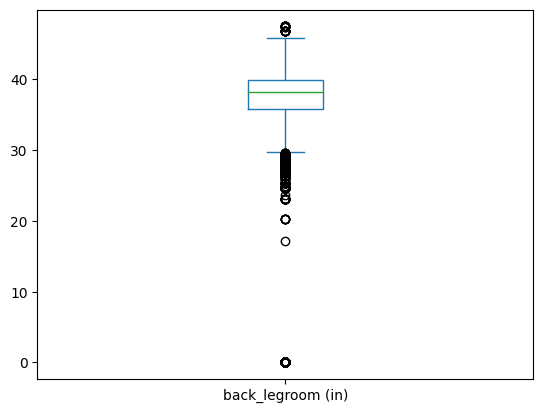

In [68]:
df_train['back_legroom (in)'].plot(kind='box')

## num_of_cylinders

In [69]:
# checking for the total amount of null values as a percentage.
percentage = df_train['num_of_cylinders'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the num_of_cylinders column is {percentage.round(2)}%.")

The amount of null values in the num_of_cylinders column is 1.62%.


In [70]:
df_train['num_of_cylinders'].value_counts()

4.0     153939
6.0      73021
8.0      33548
3.0       5698
5.0        427
2.0         97
12.0        75
10.0        38
Name: num_of_cylinders, dtype: int64

In [71]:
df_train.loc[df_train['num_of_cylinders'].isna(), 'fuel_type'].value_counts()

electric    1955
gasoline      49
diesel        18
Name: fuel_type, dtype: int64

As the electric vehicles do not have a cylinder, we can replace the null values with 0.

In [72]:
df_train.loc[df_train['fuel_type'] == 'electric', 'num_of_cylinders'] = 0.0
df_test.loc[df_test['fuel_type'] == 'electric', 'num_of_cylinders'] = 0.0
df_val.loc[df_test['fuel_type'] == 'electric', 'num_of_cylinders'] = 0.0

In [73]:
df_train['num_of_cylinders'].isna().sum()

2434

In [74]:
df_train.loc[df_train['num_of_cylinders'].isna(), 'body_type'].value_counts()

pickup truck    1521
suv              521
sedan            215
coupe             71
hatchback         67
van               13
minivan           11
wagon              7
convertible        7
Name: body_type, dtype: int64

In [75]:
df_train.loc[df_train['model_name'] == 'f-150', 'num_of_cylinders'].mode()

0    6.0
Name: num_of_cylinders, dtype: float64

In [76]:
num_cylinder_by_model = df_train.groupby('model_name')['num_of_cylinders'].agg(find_mode)
num_cylinder_by_model


model_name
1 series        6.0
1500            8.0
1m              6.0
2 series        4.0
200             4.0
               ... 
yaris ia        4.0
yukon           8.0
yukon hybrid    8.0
yukon xl        8.0
zdx             6.0
Name: num_of_cylinders, Length: 833, dtype: float64

In [77]:
df_train['num_of_cylinders'] = df_train.apply(lambda x: fill(x, 'num_of_cylinders', ['model_name'], num_cylinder_by_model), axis=1)
df_test['num_of_cylinders'] = df_test.apply(lambda x: fill(x, 'num_of_cylinders', ['model_name'], num_cylinder_by_model), axis=1)
df_val['num_of_cylinders'] = df_val.apply(lambda x: fill(x, 'num_of_cylinders', ['model_name'], num_cylinder_by_model), axis=1)

In [78]:
df_train['num_of_cylinders'].isnull().sum()

67

In [79]:
df_test['num_of_cylinders'].isnull().sum()

20

In [80]:
df_val['num_of_cylinders'].isnull().sum()

18

In [81]:
df_val.loc[df_val['num_of_cylinders'].isnull(), 'model_name']

9845                        mirai
11776    f-550 super duty chassis
17808                5500 chassis
23528                       mirai
25751    f-450 super duty chassis
26124    f-550 super duty chassis
29224    f-450 super duty chassis
41515    f-550 super duty chassis
45341    f-550 super duty chassis
47765                       mirai
49582      silverado 3500 chassis
50217                       mirai
51216    f-450 super duty chassis
52432                       mirai
56142                       mirai
56496    f-550 super duty chassis
66193    f-450 super duty chassis
67273    f-450 super duty chassis
Name: model_name, dtype: object

In [82]:
'silverdo 3500 chassis' in num_cylinder_by_model.index

False

So, for rest of the null values, we can replace them with the mode of cylinder numbers.

In [83]:
most_common = df_train['num_of_cylinders'].mode()[0]
df_train['num_of_cylinders'].fillna(most_common, inplace=True)
df_test['num_of_cylinders'].fillna(most_common, inplace=True)
df_val['num_of_cylinders'].fillna(most_common, inplace=True)

In [84]:
df_train['num_of_cylinders'].value_counts(dropna=False)

4.0     154463
6.0      73856
8.0      34466
3.0       5846
0.0       1955
5.0        431
2.0        100
12.0        75
10.0        40
Name: num_of_cylinders, dtype: int64

## city_fuel_economy

In [85]:
# checking for the total amount of null values as a percentage.
percentage = df_train['city_fuel_economy'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the city_fuel_economy column is {percentage.round(2)}%.")

The amount of null values in the city_fuel_economy column is 13.36%.


<Axes: >

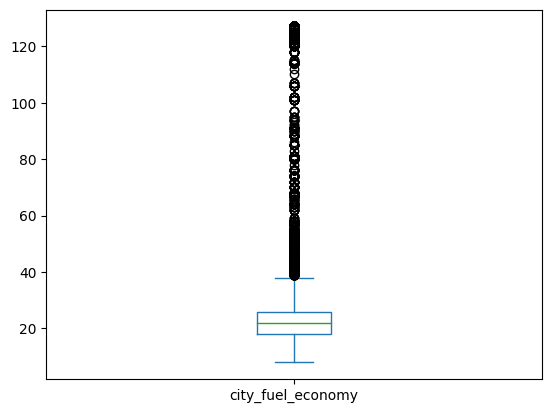

In [86]:
df_train['city_fuel_economy'].plot(kind='box')

<ipython-input-87-d1c00d93a566>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['city_fuel_economy'])


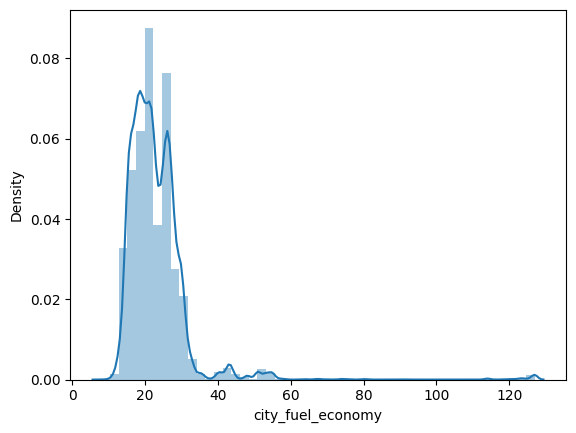

In [87]:
sns.distplot(df_train['city_fuel_economy'])
plt.show()

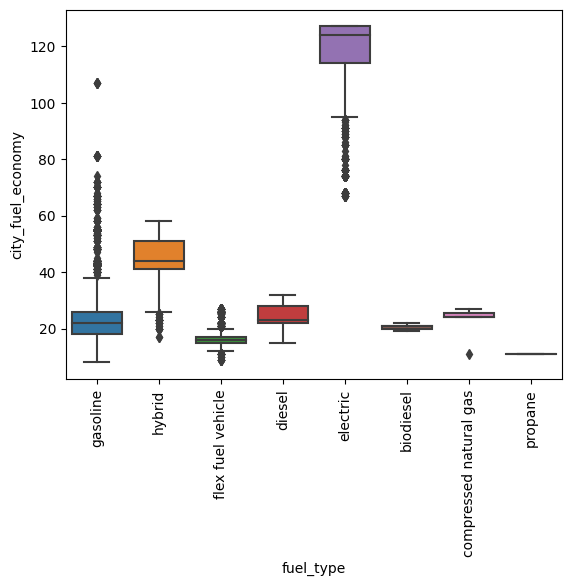

In [88]:
ax = sns.boxplot(x=df_train['fuel_type'], y=df_train['city_fuel_economy'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

As we can observe, most of the vehicles having city fuel economy above 65 mpg are mostly electric vehicles. So, they are not truly outliers.

In [89]:
median_city_model = df_train.groupby('model_name')['city_fuel_economy'].median()

In [90]:
df_train['city_fuel_economy'] = df_train.apply(lambda x: fill(x, 'city_fuel_economy', ['model_name'], median_city_model), axis=1)
df_test['city_fuel_economy'] = df_test.apply(lambda x: fill(x, 'city_fuel_economy', ['model_name'], median_city_model), axis=1)
df_val['city_fuel_economy'] = df_val.apply(lambda x: fill(x, 'city_fuel_economy', ['model_name'], median_city_model), axis=1)

In [91]:
df_train['city_fuel_economy'].isnull().sum()

6335

<Axes: xlabel='num_of_cylinders', ylabel='city_fuel_economy'>

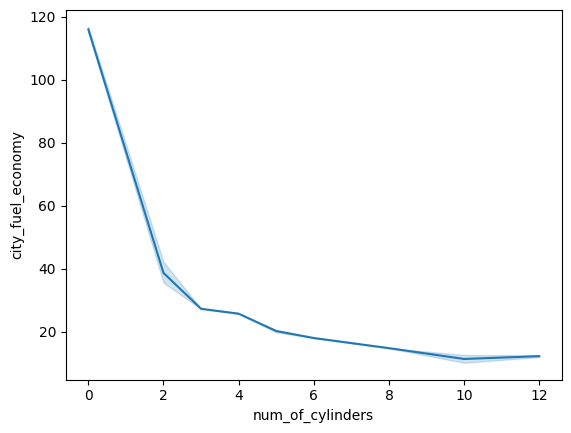

In [92]:
sns.lineplot(x="num_of_cylinders", y="city_fuel_economy", data=df_train)

We can observe that the city fuel economy decreases for the vehicles with more number of cylinders. The fuel economy of a vehicle typically decreases with the number of gas cylinders due to a combination of factors.

Firstly, vehicles with more cylinders tend to have larger engines, which require more fuel to operate. This can lead to decreased fuel efficiency compared to vehicles with smaller engines.

Secondly, vehicles with more cylinders often have more power, which can lead to more aggressive driving and a higher demand for fuel. This can further decrease fuel efficiency.

Finally, vehicles with more cylinders may be heavier, which can also decrease fuel efficiency as more energy is required to move the vehicle.

Of course, the heavier vehicles are also more likely to have larger engines, which can further decrease fuel efficiency. Below we show how body_type may affect city_fuel_economy.

We can observe, heavier trucks, vans and SUVs have lower city fuel economy than lighter cars. This is because trucks and SUVs are heavier than cars and therefore require more fuel to move.

In [93]:
median_ct_econ_body_cylinder = df_train.groupby(['body_type', 'num_of_cylinders'])['city_fuel_economy'].agg('median')

In [94]:
df_train['city_fuel_economy'] = df_train.apply(lambda x: fill(x, 'city_fuel_economy', ['body_type', 'num_of_cylinders'], median_ct_econ_body_cylinder), axis=1)
df_test['city_fuel_economy'] = df_test.apply(lambda x: fill(x, 'city_fuel_economy', ['body_type', 'num_of_cylinders'], median_ct_econ_body_cylinder), axis=1)
df_val['city_fuel_economy'] = df_val.apply(lambda x: fill(x, 'city_fuel_economy', ['body_type', 'num_of_cylinders'], median_ct_econ_body_cylinder), axis=1)

In [95]:
df_train['city_fuel_economy'].isnull().sum()

4

In [96]:
df_train.loc[df_train['city_fuel_economy'].isnull(), 'model_name']

14456    tt rs
47092    tt rs
56444    tt rs
91894    tt rs
Name: model_name, dtype: object

Even after these treatments, there are still some missing values in the city_fuel_economy column. We fill these missing values with the median city_fuel_economy for a vehicle.

In [97]:
median_value = df_train['city_fuel_economy'].median()
df_train['city_fuel_economy'].fillna(median_value, inplace=True)
df_test['city_fuel_economy'].fillna(median_value, inplace=True)
df_val['city_fuel_economy'].fillna(median_value, inplace=True)

<ipython-input-98-f7fec17f5e28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['city_fuel_economy'])


<Axes: xlabel='city_fuel_economy', ylabel='Density'>

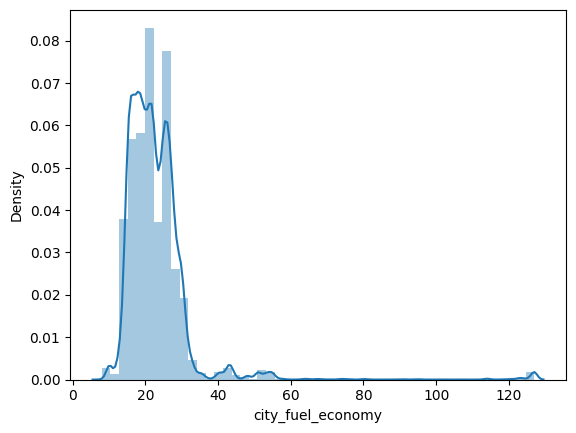

In [98]:
sns.distplot(df_train['city_fuel_economy'])

We can see the distribution doesn't change much after the treatment.

In [99]:
df_train['city_fuel_economy'].isnull().sum()

0

## highway_fuel_economy

In [100]:
# checking for the total amount of null values as a percentage.
percentage = df_train['highway_fuel_economy'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the highway_fuel_economy column is {percentage.round(2)}%.")

The amount of null values in the highway_fuel_economy column is 13.36%.


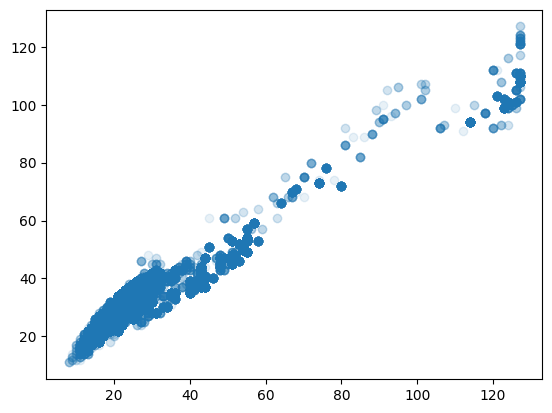

In [101]:
plt.plot(df_train['city_fuel_economy'], df_train['highway_fuel_economy'], 'o', alpha=0.1)

Thus, there is a strong correlation between the city_fuel_economy and the highway_fuel_economy.

In [102]:
df_train['city_fuel_economy'].corr(df_train['highway_fuel_economy'])

0.9471513085842689

As the city_fuel_economy and highway_fuel_economy are highly correlated, we can use the city_fuel_economy to impute the highway_fuel_economy.

In [103]:
from sklearn.linear_model import LinearRegression

# Create a new DataFrame with only the columns needed for imputation
impute_df = df_train[['city_fuel_economy', 'highway_fuel_economy']].copy()

# Drop rows with missing values
impute_df.dropna(inplace=True)

# Train a linear regression model to predict numerical_col_1 from numerical_col_2
reg = LinearRegression().fit(impute_df[['city_fuel_economy']], impute_df['highway_fuel_economy'])

# Impute missing values using the linear regression model
df_train.loc[df_train['highway_fuel_economy'].isnull(), 'highway_fuel_economy'] = reg.predict(df_train.loc[df_train['highway_fuel_economy'].isnull(), ['city_fuel_economy']])

In [104]:
# checking for the total amount of null values as a percentage.
percentage = df_train['highway_fuel_economy'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the highway_fuel_economy column is {percentage.round(2)}%.")

The amount of null values in the highway_fuel_economy column is 0.0%.


In [105]:
# checking for the total amount of null values as a percentage.
percentage = df_test['highway_fuel_economy'].isna().sum() / df_test.shape[0] * 100

print(f"The amount of null values in the highway_fuel_economy column is {percentage.round(2)}%.")

The amount of null values in the highway_fuel_economy column is 13.28%.


In [106]:
df_test.loc[df_test['highway_fuel_economy'].isnull(), 'highway_fuel_economy'] = reg.predict(df_test.loc[df_test['highway_fuel_economy'].isnull(), ['city_fuel_economy']])

In [107]:
df_val.loc[df_val['highway_fuel_economy'].isnull(), 'highway_fuel_economy'] = reg.predict(df_val.loc[df_val['highway_fuel_economy'].isnull(), ['city_fuel_economy']])

## daysonmarket

In [108]:
# checking for the total amount of null values as a percentage.
percentage = df_train['daysonmarket'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the daysonmarket column is {percentage.round(2)}%.")

The amount of null values in the daysonmarket column is 0.0%.


<Axes: ylabel='Frequency'>

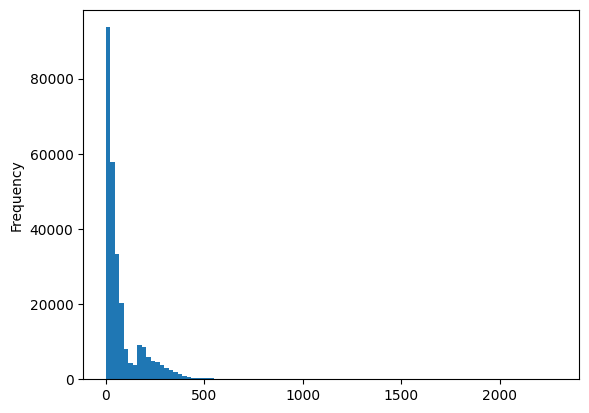

In [109]:
df_train['daysonmarket'].plot(kind='hist', bins=100)

We can observe that the daysonmarket is right-skewed. This is because there are a lot of vehicles that are sold within a few days of being listed. However, we know from corelation analysis that 'daysonmarket' has a very low correlation with the target variable and other numerical variables. Thus, we can mark this column for deletion.

## dealer_zip

In [110]:
# checking for the total amount of null values as a percentage.
percentage = df_train['dealer_zip'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the dealer_zip column is {percentage.round(2)}%.")

The amount of null values in the dealer_zip column is 0.0%.


In [111]:
df_train['dealer_zip'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 271232 entries, 0 to 271231
Series name: dealer_zip
Non-Null Count   Dtype 
--------------   ----- 
271232 non-null  object
dtypes: object(1)
memory usage: 2.1+ MB


In [112]:
df_train['dealer_zip'].value_counts()

33619    562
77477    543
78238    484
85260    472
33331    472
        ... 
29655      1
42003      1
35040      1
94931      1
29420      1
Name: dealer_zip, Length: 7117, dtype: int64

As the number of unique values in the dealer_zip column is very high, we cannot one-hot encode it. We can use the dealer_zip to impute the dealer_state. We can then use the dealer_state to impute the dealer_city.

In [113]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.8 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6943 sha256=bd630cfd3e5720bbc450cd291d82044d7a2441b9bb52e56767bd00d479253e0d
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.16
    Uninstalling SQLAlchemy-2.0.16:
      Successfully uninstalled SQLAlchemy-2.0.16


In [114]:
from uszipcode import SearchEngine
search = SearchEngine()

# creating a function to return the region for the zip code
def get_state(zip_code):
    try:
        zipcode = search.by_zipcode(zip_code)
        return zipcode.state
    except:
        return 'unknown'

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [115]:
# applying the function to the column
df_train['dealer_state'] = df_train['dealer_zip'].apply(get_state)

# checking the result
df_train['dealer_state'].value_counts()

TX         28284
CA         25738
FL         21815
OH         12889
IL         12543
PA         10414
NY          9882
MI          9712
NC          9375
GA          8627
NJ          7791
VA          7582
AZ          6802
IN          6683
MA          6569
MO          6352
MN          6198
WI          6186
TN          6125
CO          5687
MD          5457
OK          3947
SC          3864
AL          3616
KY          3465
LA          3313
CT          2986
IA          2873
NV          2746
UT          2571
NE          2282
KS          2249
AR          2209
NH          2107
MS          1602
NM          1477
ID          1275
WV          1204
ND           936
RI           920
ME           883
VT           769
DE           755
WA           704
MT           673
SD           665
WY           297
OR           100
unknown       24
PR             9
Name: dealer_state, dtype: int64

In [116]:
# applying the function to the column
df_test['dealer_state'] = df_test['dealer_zip'].apply(get_state)

# checking the result
df_val['dealer_state'] = df_val['dealer_zip'].apply(get_state)

In [117]:
# grouping the states by region
region_dict = {'CA': 'West', 'TX': 'South', 'FL': 'South', 'NY': 'Northeast',
               'PA': 'Northeast', 'IL': 'Midwest', 'OH': 'Midwest', 'GA': 'South', 'NC': 'South',
               'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South', 'WA': 'West', 'AZ': 'West',
               'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest', 'MD': 'South',
               'CO': 'West', 'MN': 'Midwest', 'SC': 'South', 'AL': 'South', 'LA': 'South', 'WI': 'Midwest',
               'OR': 'West', 'KY': 'South', 'OK': 'South', 'CT': 'Northeast', 'IA': 'Midwest', 'NV': 'West',
               'UT': 'West', 'AR': 'South', 'MS': 'South', 'KS': 'Midwest', 'NM': 'West', 'NE': 'Midwest',
               'NH': 'Northeast', 'ID': 'West', 'ME': 'Northeast', 'RI': 'Northeast', 'WV': 'South', 'MT': 'West',
               'DE': 'South', 'AK': 'West', 'DC': 'South', 'ND': 'Midwest', 'SD': 'Midwest', 'VT': 'Northeast',
               'WY': 'West', 'HI': 'West', 'PR': 'South', 'GU': 'West', 'VI': 'South', 'MP': 'West', 'AS': 'South',
               'FM': 'West', 'MH': 'West', 'PW': 'West', 'AA': 'South', 'AE': 'South', 'AP': 'South', 'unknown': 'unknown'}

# mapping the dictionary to the column
df_train['dealer_region'] = df_train['dealer_state'].map(region_dict)
df_test['dealer_region'] = df_test['dealer_state'].map(region_dict)
df_val['dealer_region'] = df_val['dealer_state'].map(region_dict)

# checking the result
df_train['dealer_region'].value_counts()

South        111249
Midwest       69568
West          48070
Northeast     42321
unknown          24
Name: dealer_region, dtype: int64

## front_legroom

In [118]:
# checking for the total amount of null values as a percentage.
percentage = df_train['front_legroom (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the front_legroom column is {percentage.round(2)}%.")

The amount of null values in the front_legroom column is 2.83%.


<Axes: >

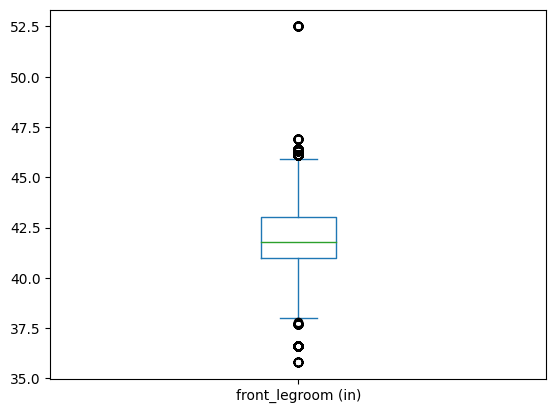

In [119]:
# Check the boxplot of the back_legroom column.
df_train['front_legroom (in)'].plot(kind='box')

The results show that most of the vehicles have a front legroom of ~42 inches. We can also see that there are some vehicles having more than 50 inch space for front legroom. Let's take a closer look at these outliers.

In [120]:
frontlegroom_more_than_50= df_train.loc[df_train['front_legroom (in)'] > 50, ['body_type', 'maximum_seating', 'make_name', 'model_name', 'front_legroom (in)']]
frontlegroom_more_than_50['model_name'].value_counts()

g-class    49
Name: model_name, dtype: int64

It appears that all the vehicles with front legroom greater than 50 inches belong to the same model: Mercedes Benz G-Class. After a quick google search, we can see that the front legroom of this model is about 38.7 inches. So, there was an entry error in the data. Let's first see if there are other vehicles with the same model in the dataset.

In [121]:
df_train.loc[(df_train['make_name'] == 'mercedes-benz') & (df_train['model_name'] == 'g-class') & (df_train['front_legroom (in)'] < 50), 'front_legroom (in)']

4435      38.7
5087      38.7
17351     38.7
40963     38.7
58155     38.7
61321     38.7
68651     38.7
74228     38.7
74569     38.7
79064     38.7
94693     38.7
95130     38.7
99764     38.7
111184    38.7
125944    38.7
134733    38.7
156493    38.7
162866    38.7
170807    38.7
187915    38.7
209087    38.7
242804    38.7
251413    38.7
264294    38.7
268085    38.7
Name: front_legroom (in), dtype: float64

As we can see, these mercedes benz g-class vehicles have a front legroom of 38.7 inches. So, we can replace the front legroom of these vehicles with 38.7 inches.

In [122]:
df_train.loc[(df_train['make_name'] == 'mercedes-benz') & (df_train['model_name'] == 'g-class') & (df_train['front_legroom (in)'] > 50), 'front_legroom (in)'] = 38.7

In [123]:
df_test.loc[(df_test['make_name'] == 'mercedes-benz') & (df_test['model_name'] == 'g-class') & (df_test['front_legroom (in)'] > 50), 'front_legroom (in)'] = 38.7

In [124]:
df_val.loc[(df_val['make_name'] == 'mercedes-benz') & (df_val['model_name'] == 'g-class') & (df_val['front_legroom (in)'] > 50), 'front_legroom (in)'] = 38.7

<Axes: >

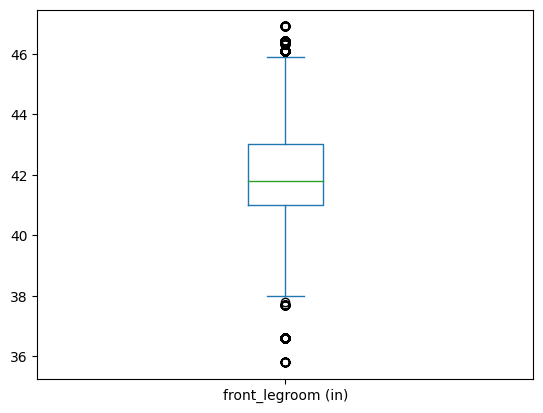

In [125]:
df_train['front_legroom (in)'].plot(kind='box')

In [126]:
median_frontlegroom_model = df_train.groupby('model_name')['front_legroom (in)'].median()

In [127]:
df_train['front_legroom (in)'] = df_train.apply(lambda x: fill(x, 'front_legroom (in)', ['model_name'], median_frontlegroom_model), axis=1)
df_test['front_legroom (in)'] = df_test.apply(lambda x: fill(x, 'front_legroom (in)', ['model_name'], median_frontlegroom_model), axis=1)
df_val['front_legroom (in)'] = df_val.apply(lambda x: fill(x, 'front_legroom (in)', ['model_name'], median_frontlegroom_model), axis=1)

In [128]:
df_train['front_legroom (in)'].isnull().sum()

2280

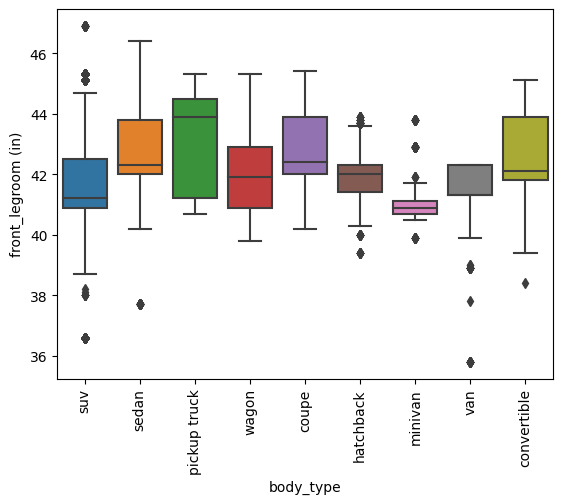

In [129]:
ax = sns.boxplot(x='body_type', y='front_legroom (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [130]:
groups = df_train[df_train['front_legroom (in)'].notnull()].groupby('body_type')['front_legroom (in)'].apply(list)
f_value, p_value = stats.f_oneway(*groups)
print(f"ANOVA results for {'body_type'}:")
print(f"  F-value: {f_value}")
print(f"  p-value: {p_value}\n")

ANOVA results for body_type:
  F-value: 8722.784651760207
  p-value: 0.0



Thus, the mean of 'front_legroom (in)' columns is significantlly different for different 'body_type'.

In [131]:
median_frontlegroom_body = df_train.groupby('body_type')['front_legroom (in)'].median()

In [132]:
df_train['front_legroom (in)'] = df_train.apply(lambda x: fill(x, 'front_legroom (in)', ['body_type'], median_frontlegroom_body), axis=1)
df_test['front_legroom (in)'] = df_test.apply(lambda x: fill(x, 'front_legroom (in)', ['body_type'], median_frontlegroom_body), axis=1)
df_val['front_legroom (in)'] = df_val.apply(lambda x: fill(x, 'front_legroom (in)', ['body_type'], median_frontlegroom_body), axis=1)

In [133]:
# checking for the total amount of null values as a percentage.
percentage = df_train['front_legroom (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the front_legroom column is {percentage.round(2)}%.")

The amount of null values in the front_legroom column is 0.0%.


In [134]:
median_frontleg = df_train['front_legroom (in)'].median()
df_train['front_legroom (in)'].fillna(median_frontleg, inplace=True)
df_test['front_legroom (in)'].fillna(median_frontleg, inplace=True)
df_val['front_legroom (in)'].fillna(median_frontleg, inplace=True)

## height (in)

In [135]:
# checking for the total amount of null values as a percentage.
percentage = df_train['height (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the height column is {percentage.round(2)}%.")

The amount of null values in the height column is 2.83%.


<Axes: >

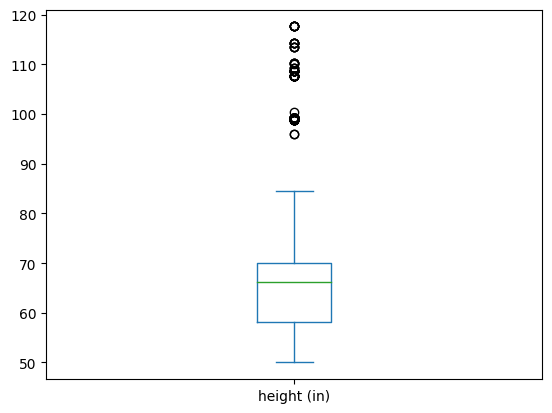

In [136]:
df_train['height (in)'].plot(kind='box')

In [137]:
df_train.loc[df_train['height (in)'] > 90, 'body_type'].value_counts()

van             177
pickup truck      2
Name: body_type, dtype: int64

In [138]:
df_train.loc[df_train['height (in)'] > 90].groupby(['make_name', 'model_name']).size()

make_name      model_name       
ford           transit crew          15
               transit passenger    144
gmc            sierra 3500hd          2
mercedes-benz  sprinter              18
dtype: int64

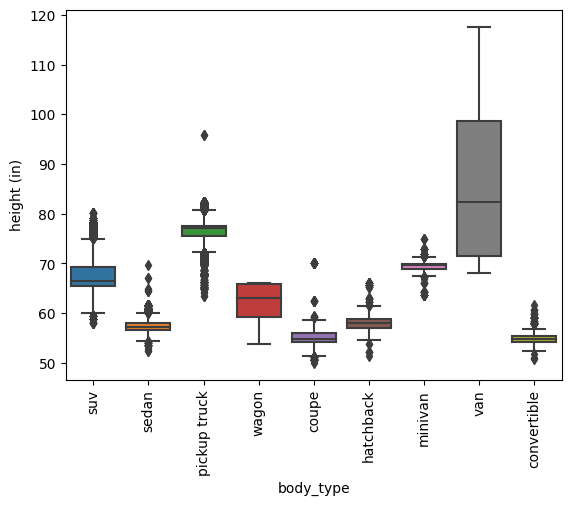

In [139]:
ax = sns.boxplot(x='body_type', y='height (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

From this boxplot, it is clear that the vans and pickup trucks have a higher height than the other body types. The height of these vehicles appear as outliers in the combined boxplot. But they are not actually outliers.

In [140]:
median_height_model = df_train.groupby('model_name')['height (in)'].median()
median_height_body = df_train.groupby('body_type')['height (in)'].median()

In [141]:
df_train['height (in)'] = df_train.apply(lambda x: fill(x, 'height (in)', ['model_name'], median_height_model), axis=1)
df_test['height (in)'] = df_test.apply(lambda x: fill(x, 'height (in)', ['model_name'], median_height_model), axis=1)
df_val['height (in)'] = df_val.apply(lambda x: fill(x, 'height (in)', ['model_name'], median_height_model), axis=1)

In [142]:
df_train['height (in)'] = df_train.apply(lambda x: fill(x, 'height (in)', ['body_type'], median_height_body), axis=1)
df_test['height (in)'] = df_test.apply(lambda x: fill(x, 'height (in)', ['body_type'], median_height_body), axis=1)
df_val['height (in)'] = df_val.apply(lambda x: fill(x, 'height (in)', ['body_type'], median_height_body), axis=1)

In [143]:
# checking for the total amount of null values as a percentage.
percentage = df_train['height (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the height column is {percentage.round(2)}%.")

The amount of null values in the height column is 0.0%.


In [144]:
median_height = df_train['height (in)'].median()
df_train['height (in)'].fillna(median_height, inplace=True)
df_test['height (in)'].fillna(median_height, inplace=True)
df_val['height (in)'].fillna(median_height, inplace=True)

## length (in)

In [145]:
# checking for the total amount of null values as a percentage.
percentage = df_train['length (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the length column is {percentage.round(2)}%.")

The amount of null values in the length column is 2.83%.


<Axes: >

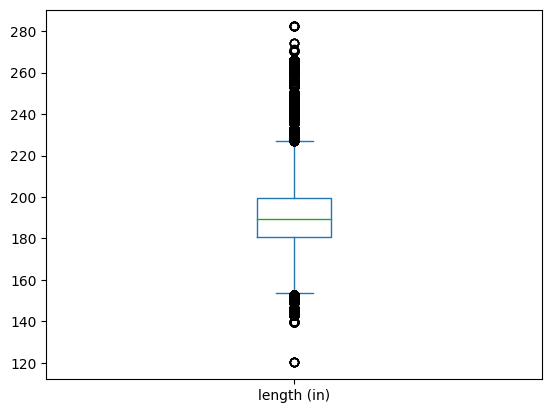

In [146]:
df_train['length (in)'].plot(kind='box')

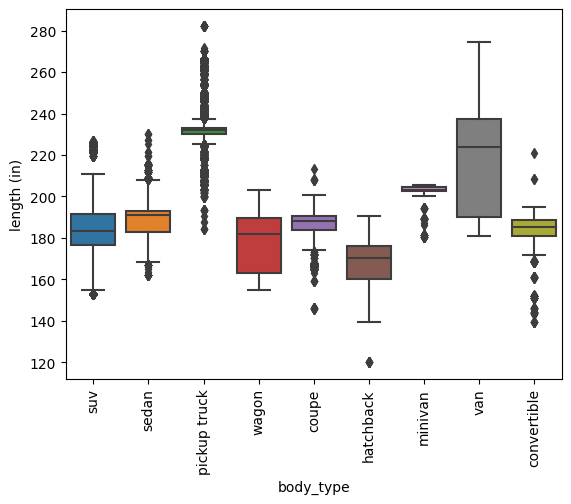

In [147]:
ax = sns.boxplot(x='body_type', y='length (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It is clear that the vans and pickup trucks have a longer length than the other body types. On the other hand, the hatchbacks are the shortest. The length of these vehicles appear as outliers in the combined boxplot.

In [148]:
median_length_model = df_train.groupby('model_name')['length (in)'].median()
median_length_body = df_train.groupby('body_type')['length (in)'].median()


In [149]:
df_train['length (in)'] = df_train.apply(lambda x: fill(x, 'length (in)', ['model_name'], median_length_model), axis=1)
df_test['length (in)'] = df_test.apply(lambda x: fill(x, 'length (in)', ['model_name'], median_length_model), axis=1)
df_val['length (in)'] = df_val.apply(lambda x: fill(x, 'length (in)', ['model_name'], median_length_model), axis=1)

In [150]:
df_train['length (in)'] = df_train.apply(lambda x: fill(x, 'length (in)', ['body_type'], median_length_body), axis=1)
df_test['length (in)'] = df_test.apply(lambda x: fill(x, 'length (in)', ['body_type'], median_length_body), axis=1)
df_val['length (in)'] = df_val.apply(lambda x: fill(x, 'length (in)', ['body_type'], median_length_body), axis=1)

In [151]:
# checking for the total amount of null values as a percentage.
percentage = df_train['length (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the length column is {percentage.round(2)}%.")

The amount of null values in the length column is 0.0%.


In [152]:
median_length = df_train['length (in)'].median()
df_train['length (in)'].fillna(median_length, inplace=True)
df_test['length (in)'].fillna(median_length, inplace=True)
df_val['length (in)'].fillna(median_length, inplace=True)

## width (in)

In [153]:
# checking for the total amount of null values as a percentage.
percentage = df_train['width (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the width column is {percentage.round(2)}%.")

The amount of null values in the width column is 2.83%.


<Axes: >

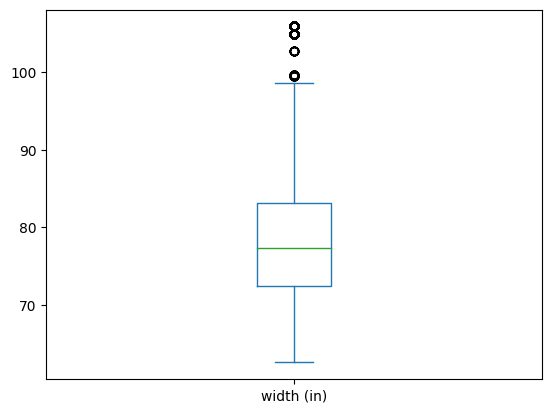

In [154]:
df_train['width (in)'].plot(kind='box')

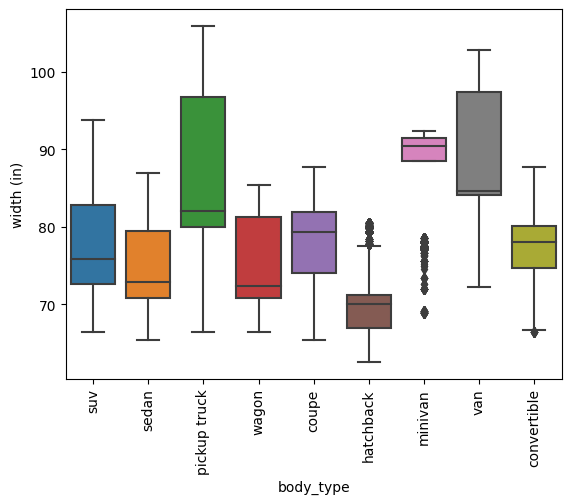

In [155]:
ax = sns.boxplot(x='body_type', y='width (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Similar to height and length, the vans and pickup trucks have a wider width than the other body types. The width of these vehicles appear as outliers in the combined boxplot.

We can observe that there are some unusually low values for width of minivan. Let's take a closer look at these vehicles.

In [156]:
df_train.loc[(df_train['width (in)'] < 80) & (df_train['body_type'] == 'minivan')].groupby(['make_name', 'model_name'])['width (in)'].median()

make_name  model_name    
chevrolet  astro             77.50
           uplander          72.00
           venture           72.00
chrysler   town & country    78.60
           voyager           78.60
dodge      caravan           78.60
           grand caravan     78.60
ford       freestar          76.60
           windstar          76.60
honda      odyssey           77.10
hyundai    entourage         78.10
kia        sedona            78.10
mazda      mazda5            69.00
nissan     quest             77.60
plymouth   voyager           76.80
pontiac    montana           72.35
           montana sv6       72.00
saturn     relay             72.00
toyota     sienna            78.10
Name: width (in), dtype: float64

After double checking the width of all the vehicles, we can see that the width of the vehicles are correct. So, they are not outliers.

In [157]:
median_width_model = df_train.groupby('model_name')['width (in)'].median()
median_width_body = df_train.groupby('body_type')['width (in)'].median()

In [158]:
df_train['width (in)'] = df_train.apply(lambda x: fill(x, 'width (in)', ['model_name'], median_width_model), axis=1)
df_test['width (in)'] = df_test.apply(lambda x: fill(x, 'width (in)', ['model_name'], median_width_model), axis=1)
df_val['width (in)'] = df_val.apply(lambda x: fill(x, 'width (in)', ['model_name'], median_width_model), axis=1)

In [159]:
df_train['width (in)'] = df_train.apply(lambda x: fill(x, 'width (in)', ['body_type'], median_width_body), axis=1)
df_test['width (in)'] = df_test.apply(lambda x: fill(x, 'width (in)', ['body_type'], median_width_body), axis=1)
df_val['width (in)'] = df_val.apply(lambda x: fill(x, 'width (in)', ['body_type'], median_width_body), axis=1)

In [160]:
# checking for the total amount of null values as a percentage.
percentage = df_train['width (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the width column is {percentage.round(2)}%.")

The amount of null values in the width column is 0.0%.


In [161]:
median_width = df_train['width (in)'].median()
df_train['width (in)'].fillna(median_width, inplace=True)
df_test['width (in)'].fillna(median_width, inplace=True)
df_val['width (in)'].fillna(median_width, inplace=True)

## fuel_tank_volume (gal)

In [162]:
# checking for the total amount of null values as a percentage.
percentage = df_train['fuel_tank_volume (gallon)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the fuel_tank_volume (gallon) column is {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume (gallon) column is 2.83%.


<Axes: >

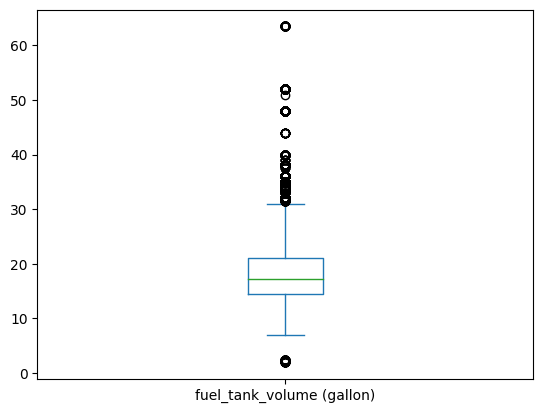

In [163]:
df_train['fuel_tank_volume (gallon)'].plot(kind='box')

In [164]:
fuel_volume_less_than_5= df_train.loc[df_train['fuel_tank_volume (gallon)'] < 5, ['body_type', 'fuel_type', 'make_name', 'model_name', 'num_of_cylinders', 'fuel_tank_volume (gallon)']]
fuel_volume_less_than_5

,body_type,fuel_type,make_name,model_name,num_of_cylinders,fuel_tank_volume (gallon)
3826,wagon,gasoline,bmw,i3,2.0,2.4
4526,wagon,gasoline,bmw,i3,2.0,1.9
8201,wagon,gasoline,bmw,i3,2.0,2.4
9184,wagon,gasoline,bmw,i3,2.0,2.4
10633,wagon,gasoline,bmw,i3,2.0,2.4
...,...,...,...,...,...,...
264256,wagon,gasoline,bmw,i3,2.0,1.9
265206,wagon,gasoline,bmw,i3,2.0,1.9
267273,wagon,gasoline,bmw,i3,2.0,2.4
267742,wagon,gasoline,bmw,i3,2.0,2.3


In [165]:
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), ['city_fuel_economy', 'highway_fuel_economy', 'fuel_type', 'num_of_cylinders', 'fuel_tank_volume (gallon)', 'horsepower', 'torque (rpm)']]

,city_fuel_economy,highway_fuel_economy,fuel_type,num_of_cylinders,fuel_tank_volume (gallon),horsepower,torque (rpm)
3826,36.0,33.000000,gasoline,2.0,2.4,170.0,NaN
4526,41.0,37.000000,gasoline,2.0,1.9,170.0,NaN
5501,127.0,111.000000,electric,0.0,NaN,NaN,NaN
6080,41.0,44.462562,electric,0.0,NaN,NaN,NaN
8201,36.0,33.000000,gasoline,2.0,2.4,170.0,NaN
...,...,...,...,...,...,...,...
264256,41.0,37.000000,gasoline,2.0,1.9,170.0,NaN
265206,41.0,37.000000,gasoline,2.0,1.9,170.0,NaN
267273,41.0,44.462562,gasoline,2.0,2.4,170.0,NaN
267742,41.0,44.462562,gasoline,2.0,2.3,181.0,NaN


From google search, we found that BMW i3 is actually an electric vehicle. But it has an optional range-extending petrol engine. That's why, in some entries, the vehicle is recorded as a gasoline car and all the data was recorded accordingly. Here, we will standardize all the entries of BMW i3 to electric and change other values accordingly based on data collected from [here](https://www.car.info/en-se/bmw/i3/i3-s-2019-18084605/specs).

In [166]:
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'fuel_type'] = 'electric'
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'num_of_cylinders'] = 0.0
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'city_fuel_economy'] = 124.0
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'highway_fuel_economy'] = 102.00000
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'fuel_tank_volume (gallon)'] = np.nan
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'horsepower'] = np.nan
df_train.loc[(df_train['make_name'] == 'bmw') & (df_train['model_name'] == 'i3'), 'torque (rpm)'] = np.nan

In [167]:
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'fuel_type'] = 'electric'
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'num_of_cylinders'] = 0.0
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'city_fuel_economy'] = 124.0
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'highway_fuel_economy'] = 102.00000
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'fuel_tank_volume (gallon)'] = np.nan
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'horsepower'] = np.nan
df_test.loc[(df_test['make_name'] == 'bmw') & (df_test['model_name'] == 'i3'), 'torque (rpm)'] = np.nan

<Axes: >

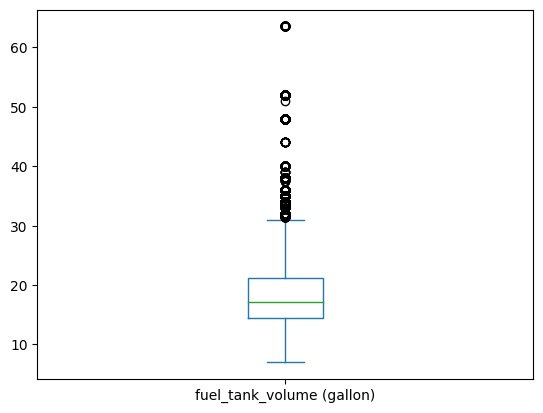

In [168]:
df_train['fuel_tank_volume (gallon)'].plot(kind='box')

In [169]:
fuel_volume_more_than_40= df_train.loc[df_train['fuel_tank_volume (gallon)'] > 40, ['body_type', 'fuel_type', 'make_name', 'model_name', 'num_of_cylinders', 'fuel_tank_volume (gallon)']]
fuel_volume_more_than_40

,body_type,fuel_type,make_name,model_name,num_of_cylinders,fuel_tank_volume (gallon)
36,pickup truck,gasoline,chevrolet,silverado 3500hd chassis,8.0,63.5
55,suv,diesel,ford,excursion,8.0,44.0
165,pickup truck,biodiesel,ford,f-250 super duty,8.0,48.0
437,pickup truck,biodiesel,chevrolet,silverado 3500hd chassis,8.0,63.5
484,pickup truck,flex fuel vehicle,ford,f-250 super duty,8.0,48.0
...,...,...,...,...,...,...
270375,pickup truck,diesel,ram,3500 chassis,6.0,52.0
270519,pickup truck,biodiesel,ford,f-350 super duty,8.0,48.0
270773,pickup truck,biodiesel,ford,f-350 super duty,8.0,48.0
270824,pickup truck,NaN,ford,f-250 super duty,8.0,48.0


In [170]:
fuel_volume_more_than_40.groupby(['make_name', 'model_name'])['fuel_tank_volume (gallon)'].median()

make_name  model_name              
chevrolet  silverado 3500hd chassis    63.5
dodge      ram 3500 chassis            52.0
ford       excursion                   44.0
           f-250 super duty            48.0
           f-350 super duty            48.0
           f-450 super duty            48.0
gmc        sierra 3500hd chassis       63.5
hummer     h1 alpha                    51.0
ram        3500 chassis                52.0
Name: fuel_tank_volume (gallon), dtype: float64

After checking the fuel tank volume of these models, we can verify these are legit data.

In [171]:
fuel_volume_more_than_40['body_type'].value_counts()

pickup truck    1020
suv               13
Name: body_type, dtype: int64

It appears that almost all the vehicles with fuel_tank_volume greater than 40 gallons are pickup trucks. Let's take a closer look if pickup trucks always have a fuel_tank_volume greater than 40 gallons.

<Axes: >

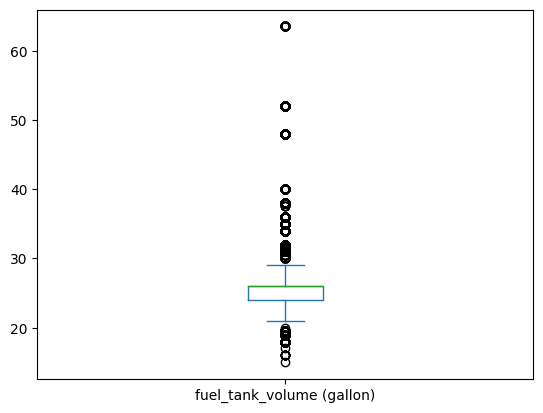

In [172]:
df_train[df_train['body_type'] == 'pickup truck']['fuel_tank_volume (gallon)'].plot(kind='box')

From this box-plot, it is clear that pickup trucks can have any fuel tank volume. So, these high fuel tank volumes are a design choice for these models. We cannot treat them as outliers.

Now, let's take a look the missing values in the fuel_tank_volume column.

In [173]:
df_train.loc[df_train['fuel_type'] == 'electric', 'fuel_tank_volume (gallon)'].value_counts(dropna=False)

NaN    2043
Name: fuel_tank_volume (gallon), dtype: int64

As we have guessed, all electric vehicles have a missing fuel_tank_volume as electric vehicles don't have a fuel tank. We can replace the null values with 0.

In [174]:
df_train.loc[df_train['fuel_type'] == 'electric', 'fuel_tank_volume (gallon)'] = 0.0
df_test.loc[df_test['fuel_type'] == 'electric', 'fuel_tank_volume (gallon)'] = 0.0

Now, we will try to fill up the missing values using the model name.

In [175]:
median_tank_volume = df_train.groupby('model_name')['fuel_tank_volume (gallon)'].median()

In [176]:
df_train['fuel_tank_volume (gallon)'] = df_train.apply(lambda x: fill(x, 'fuel_tank_volume (gallon)', ['model_name'], median_tank_volume), axis=1)
df_test['fuel_tank_volume (gallon)'] = df_test.apply(lambda x: fill(x, 'fuel_tank_volume (gallon)', ['model_name'], median_tank_volume), axis=1)
df_val['fuel_tank_volume (gallon)'] = df_val.apply(lambda x: fill(x, 'fuel_tank_volume (gallon)', ['model_name'], median_tank_volume), axis=1)

In [177]:
# checking for the total amount of null values as a percentage.
percentage = df_train['fuel_tank_volume (gallon)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the fuel_tank_volume (gallon) column is {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume (gallon) column is 0.14%.


There are still some missing values in the fuel_tank_volume column. Let's check if the fuel tank volume depends on the size of the vehicle.

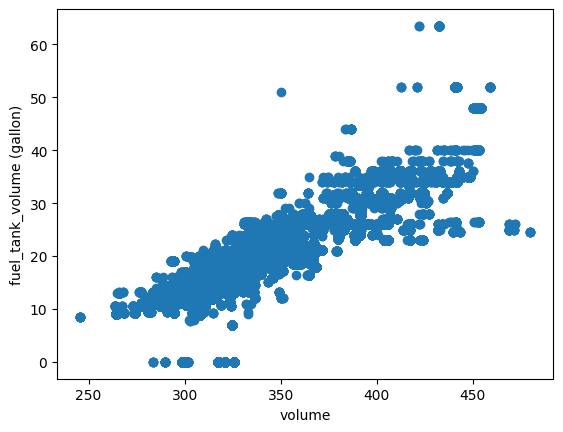

In [178]:
volume = df_train['length (in)'] + df_train['width (in)'] + df_train['height (in)']
plt.plot(volume, df_train['fuel_tank_volume (gallon)'], 'o')
plt.xlabel('volume')
plt.ylabel('fuel_tank_volume (gallon)')
plt.show()

In [179]:
volume.corr(df_train['fuel_tank_volume (gallon)'])

0.8702898325181145

Clearly, there is a high correlation between the size of the vehicle and the fuel_tank_volume. So, we can use the size of vehicle to impute the remaining missing data in the fuel_tank_volume column.

In [180]:
df_train['volume'] = df_train['length (in)'] + df_train['width (in)'] + df_train['height (in)']
df_test['volume'] = df_test['length (in)'] + df_test['width (in)'] + df_test['height (in)']

In [181]:
df_val['volume'] = df_val['length (in)'] + df_val['width (in)'] + df_val['height (in)']

In [182]:
# Create a new DataFrame with only the columns needed for imputation
impute_df = df_train[['volume', 'fuel_tank_volume (gallon)']].copy()

# Drop rows with missing values
impute_df.dropna(inplace=True)

# Train a linear regression model to predict numerical_col_1 from numerical_col_2
reg = LinearRegression().fit(impute_df[['volume']], impute_df['fuel_tank_volume (gallon)'])

# Impute missing values using the linear regression model
df_train.loc[df_train['fuel_tank_volume (gallon)'].isnull(), 'fuel_tank_volume (gallon)'] = reg.predict(df_train.loc[df_train['fuel_tank_volume (gallon)'].isnull(), ['volume']])

In [183]:
# checking for the total amount of null values as a percentage.
percentage = df_train['fuel_tank_volume (gallon)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the fuel_tank_volume (gallon) column is {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume (gallon) column is 0.0%.


In [184]:
df_test.loc[df_test['fuel_tank_volume (gallon)'].isnull(), 'fuel_tank_volume (gallon)'] = reg.predict(df_test.loc[df_test['fuel_tank_volume (gallon)'].isnull(), ['volume']])

In [185]:
df_val.loc[df_val['fuel_tank_volume (gallon)'].isnull(), 'fuel_tank_volume (gallon)'] = reg.predict(df_val.loc[df_val['fuel_tank_volume (gallon)'].isnull(), ['volume']])

## horsepower

In [186]:
# checking for the total amount of null values as a percentage.
percentage = df_train['horsepower'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the horsepower column is {percentage.round(2)}%.")

The amount of null values in the horsepower column is 3.57%.


<Axes: >

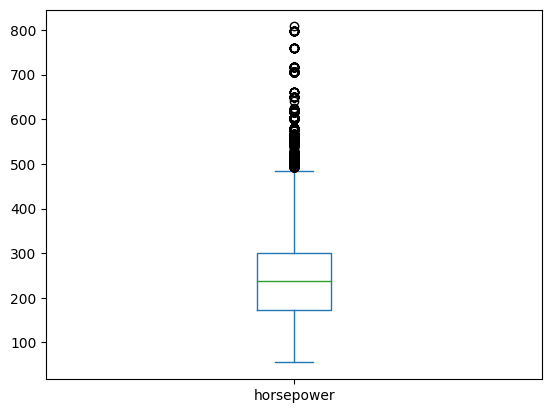

In [187]:
df_train['horsepower'].plot(kind='box')

In [188]:
df_train.loc[df_train['horsepower'] > 500, 'model_name'].value_counts()

challenger                 102
range rover                 94
range rover sport           69
camaro                      47
s-class                     45
7 series                    44
m8                          44
g-class                     44
charger                     41
mustang shelby gt500        36
c-class                     34
m5                          27
s8                          25
x5 m                        24
x6 m                        22
8 series                    20
e-class                     19
gle-class                   19
m6                          18
gt-r                        17
ghost                       17
grand cherokee              17
f-pace                      16
panamera                    14
giulia                      12
cls-class                   11
x3 m                        10
rs 7                        10
s-class coupe                9
continental gt               8
range rover velar            7
x7                           7
x4 m    

After checking the horsepowers of these models, we confirm that they are not outliers

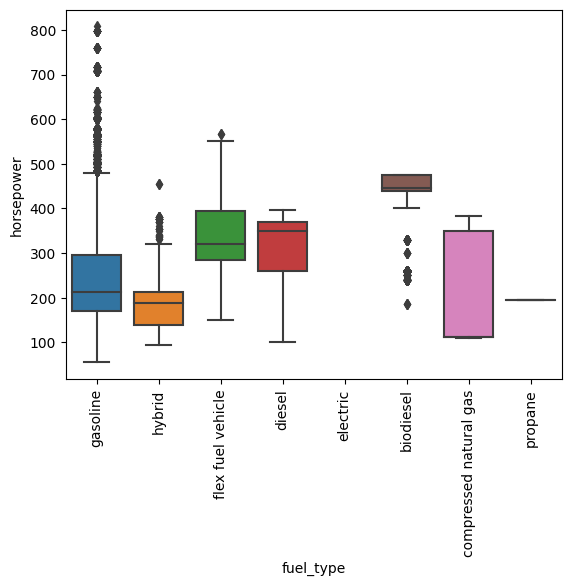

In [189]:
ax = sns.boxplot(x='fuel_type', y='horsepower', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In the figure above, we cannot observe any boxplot for electric cars.

In [190]:
df_train.loc[df_train['fuel_type'] == 'electric', 'horsepower']

72       NaN
268      NaN
839      NaN
840      NaN
851      NaN
          ..
270746   NaN
270920   NaN
270957   NaN
270997   NaN
271125   NaN
Name: horsepower, Length: 2043, dtype: float64

As we can see, the horsepower of electric vehicles have NaN values. As electric cars don't have engines, they don't have horsepower. So, we can replace the null values with 0.

In [191]:
df_train.loc[df_train['fuel_type'] == 'electric', 'horsepower'] = 0.0
df_test.loc[df_test['fuel_type'] == 'electric', 'horsepower'] = 0.0

In [192]:
median_horsepower_model = df_train.groupby('model_name')['horsepower'].median()

In [193]:
df_train['horsepower'] = df_train.apply(lambda x: fill(x, 'horsepower', ['model_name'], median_horsepower_model), axis=1)
df_test['horsepower'] = df_test.apply(lambda x: fill(x, 'horsepower', ['model_name'], median_horsepower_model), axis=1)
df_val['horsepower'] = df_val.apply(lambda x: fill(x, 'horsepower', ['model_name'], median_horsepower_model), axis=1)

In [194]:
df_train['horsepower'].isnull().sum()

350

In [195]:
df_train.corr()['horsepower']

back_legroom (in)            0.358903
city_fuel_economy           -0.587759
daysonmarket                -0.021562
num_of_cylinders             0.862141
front_legroom (in)           0.205389
fuel_tank_volume (gallon)    0.800317
height (in)                  0.599104
highway_fuel_economy        -0.638974
horsepower                   1.000000
length (in)                  0.769740
major_options_count          0.332354
maximum_seating              0.387717
mileage                      0.005483
seller_rating                0.058280
torque (rpm)                 0.082445
wheelbase (in)               0.756476
width (in)                   0.663293
year                         0.018549
actual_price                 0.642700
volume                       0.793962
Name: horsepower, dtype: float64

In [196]:
from sklearn.linear_model import LinearRegression

# Create a new DataFrame with only the columns needed for imputation
impute_df = df_train[['num_of_cylinders', 'fuel_tank_volume (gallon)', 'volume', 'horsepower']].copy()

# Drop rows with missing values
impute_df.dropna(inplace=True)

# Train a linear regression model to predict numerical_col_1 from numerical_col_2
reg = LinearRegression().fit(impute_df[['num_of_cylinders', 'fuel_tank_volume (gallon)', 'volume']], impute_df['horsepower'])

# Impute missing values using the linear regression model
df_train.loc[df_train['horsepower'].isnull(), 'horsepower'] = reg.predict(df_train.loc[df_train['horsepower'].isnull(), ['num_of_cylinders', 'fuel_tank_volume (gallon)', 'volume']])

In [197]:
df_test.loc[df_test['horsepower'].isnull(), 'horsepower'] = reg.predict(df_test.loc[df_test['horsepower'].isnull(), ['num_of_cylinders', 'fuel_tank_volume (gallon)', 'volume']])

In [198]:
df_val.loc[df_val['horsepower'].isnull(), 'horsepower'] = reg.predict(df_val.loc[df_val['horsepower'].isnull(), ['num_of_cylinders', 'fuel_tank_volume (gallon)', 'volume']])

In [199]:
# checking for the total amount of null values as a percentage.
percentage = df_train['horsepower'].isna().sum() / df_train.shape[0] * 100
print(f"The amount of null values in the horsepower column is {percentage.round(2)}%.")

The amount of null values in the horsepower column is 0.0%.


## major_options_count

In [200]:
# checking for the total amount of null values as a percentage.
percentage = df_train['major_options_count'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the major_options_count column is {percentage.round(2)}%.")

The amount of null values in the major_options_count column is 4.4%.


<Axes: xlabel='major_options_count', ylabel='Count'>

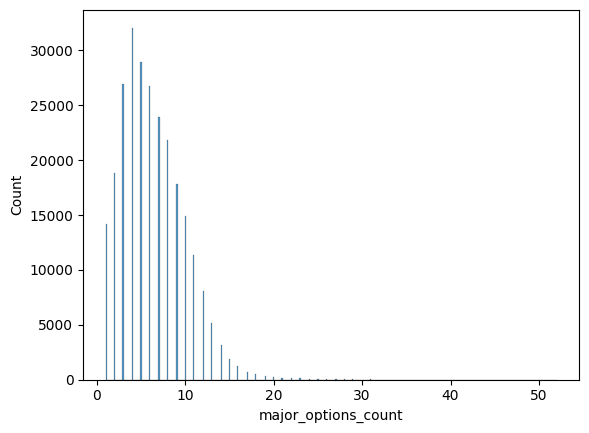

In [201]:
sns.histplot(df_train['major_options_count'])

In [202]:
df_train.loc[df_train["model_name"].str.contains("camry"), ["major_options_count", "model_name"]]

,major_options_count,model_name
7,2.0,camry hybrid
65,NaN,camry
92,8.0,camry hybrid
237,10.0,camry
287,4.0,camry
...,...,...
270811,4.0,camry hybrid
270917,2.0,camry
270979,NaN,camry
271102,3.0,camry


The major_options_count is a biased variable. The owner may have listed a common feature as major option to attract potential buyers. Moreover, there is no way we can impute the missing values. Almost each manufcatur offer multiple options for each model as we have seen for toyota camry. Therefore, it would not be a good idea to consider this varible for predicting used car price. So, we will drop this column.

## maximum_seating

In [203]:
# checking for the total amount of null values as a percentage.
percentage = df_train['maximum_seating'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the maximum_seating column is {percentage.round(2)}%.")

The amount of null values in the maximum_seating column is 2.83%.


In [204]:
df_train["maximum_seating"].value_counts()

5.0     181932
6.0      31871
7.0      26117
8.0      15285
4.0       7506
9.0        305
15.0       229
3.0        152
12.0       120
10.0        39
2.0          1
Name: maximum_seating, dtype: int64

In [205]:
pd.crosstab(index=df_train["body_type"], columns=df_train["maximum_seating"])

maximum_seating,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,15.0
body_type,,,,,,,,,,,
convertible,0,0,1049,2,0,0,0,0,0,0,0
coupe,0,0,3523,2082,0,0,0,0,0,0,0
hatchback,0,0,1311,6422,0,0,0,0,0,0,0
minivan,0,1,0,0,23,2079,3344,0,0,0,0
pickup truck,0,151,729,10480,31262,0,0,0,0,0,0
sedan,0,0,199,63829,214,0,0,0,0,0,0
suv,0,0,583,96140,372,23767,11907,305,0,0,0
van,1,0,0,58,0,216,34,0,39,120,229
wagon,0,0,111,2914,0,55,0,0,0,0,0


Therefore, we will try to fill the missing values using the model name at first. If the model name is also null, we will impute the missing values using the body type.

In [206]:
mode_seatnum_model = df_train.groupby('model_name')['maximum_seating'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)

In [207]:
mode_seatnum_body = df_train.groupby(['body_type'])['maximum_seating'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)

In [208]:
df_train['maximum_seating'] = df_train.apply(lambda x: fill(x, 'maximum_seating', ['model_name'], mode_seatnum_model), axis=1)
df_test['maximum_seating'] = df_test.apply(lambda x: fill(x, 'maximum_seating', ['model_name'], mode_seatnum_model), axis=1)
df_val['maximum_seating'] = df_val.apply(lambda x: fill(x, 'maximum_seating', ['model_name'], mode_seatnum_model), axis=1)

In [209]:
df_train['maximum_seating'].isnull().sum()

2280

In [210]:
df_train['maximum_seating'] = df_train.apply(lambda x: fill(x, 'maximum_seating', ['body_type'], mode_seatnum_body), axis=1)
df_test['maximum_seating'] = df_test.apply(lambda x: fill(x, 'maximum_seating', ['body_type'], mode_seatnum_body), axis=1)
df_val['maximum_seating'] = df_val.apply(lambda x: fill(x, 'maximum_seating', ['body_type'], mode_seatnum_body), axis=1)

In [211]:
df_train['maximum_seating'].isnull().sum()

0

In [212]:
mode_seat_num = df_train['maximum_seating'].mode()[0]
df_train['maximum_seating'].fillna(mode_seat_num, inplace=True)
df_test['maximum_seating'].fillna(mode_seat_num, inplace=True)
df_val['maximum_seating'].fillna(mode_seat_num, inplace=True)


## mileage

In [213]:
# checking for the total amount of null values as a percentage.
percentage = df_train['mileage'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the mileage column is {percentage.round(2)}%.")

The amount of null values in the mileage column is 5.45%.


<Axes: >

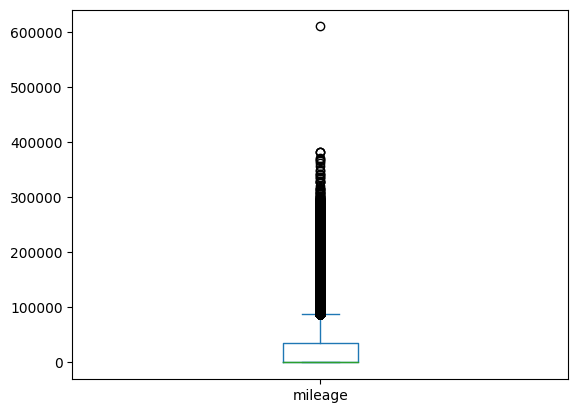

In [214]:
df_train["mileage"].plot(kind='box')

In [215]:
df_train.loc[df_train['mileage'] > 500000, ['make_name', 'model_name', 'body_type', 'mileage']]

,make_name,model_name,body_type,mileage
195386,jeep,grand cherokee,suv,610288.0


As we can see, there are too many vehicles with mileage abovr 100000 miles. Moreover, a lot of data are missing in this column. Unfortunately, we cannot impute the missing values easily as the data are missing not at random. If we had the manufacturing year of the vehicle, we could have imputed the missing values using that information. But we don't have the manufacturing year of the vehicles. So, we will convert the mileage to a categorical variable. We will use equal frequency binning.

In [216]:
df_train['mileage'] = pd.cut(df_train['mileage'], bins=[0, 50000, 100000, 150000, 200000, 650000], include_lowest=True, labels=['0-50k', '50-100k', '100-150k', '150-200k', '>200k'])
df_train['mileage'].value_counts()

0-50k       209566
50-100k      27012
100-150k     14048
150-200k      4597
>200k         1220
Name: mileage, dtype: int64

In [217]:
df_test['mileage'] = pd.cut(df_test['mileage'], bins=[0, 50000, 100000, 150000, 200000, 650000], include_lowest=True, labels=['0-50k', '50-100k', '100-150k', '150-200k', '>200k'])
df_test['mileage'].value_counts()

0-50k       65506
50-100k      8426
100-150k     4404
150-200k     1439
>200k         383
Name: mileage, dtype: int64

In [218]:
df_val['mileage'] = pd.cut(df_val['mileage'], bins=[0, 50000, 100000, 150000, 200000, 650000], include_lowest=True, labels=['0-50k', '50-100k', '100-150k', '150-200k', '>200k'])
df_val['mileage'].value_counts()

0-50k       52394
50-100k      6799
100-150k     3464
150-200k     1137
>200k         293
Name: mileage, dtype: int64

Now that we have converted the mileage to a categorical variable, we can replace the null values with another new category 'unknown'.

In [219]:
df_train['mileage'].dtype

CategoricalDtype(categories=['0-50k', '50-100k', '100-150k', '150-200k', '>200k'], ordered=True)

In [220]:
df_train['mileage'] = df_train['mileage'].cat.add_categories('unknown')
df_train['mileage'].fillna('unknown', inplace=True)

In [221]:
# checking for the total amount of null values as a percentage.
percentage = df_train['mileage'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the mileage column is {percentage.round(2)}%.")

The amount of null values in the mileage column is 0.0%.


In [222]:
df_train['mileage'].value_counts()

0-50k       209566
50-100k      27012
unknown      14789
100-150k     14048
150-200k      4597
>200k         1220
Name: mileage, dtype: int64

In [223]:
df_test['mileage'] = df_test['mileage'].cat.add_categories('unknown').fillna('unknown', inplace=True)
df_test['mileage'].fillna('unknown', inplace=True)

In [224]:
df_val['mileage'] = df_val['mileage'].cat.add_categories('unknown').fillna('unknown', inplace=True)
df_val['mileage'].fillna('unknown', inplace=True)

In [225]:
# checking for the total amount of null values as a percentage.
percentage = df_test['mileage'].isna().sum() / df_test.shape[0] * 100

print(f"The amount of null values in the mileage column is {percentage.round(2)}%.")

The amount of null values in the mileage column is 0.0%.


## seller_rating

In [226]:
# checking for the total amount of null values as a percentage.
percentage = df_train['seller_rating'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the seller_rating column is {percentage.round(2)}%.")

The amount of null values in the seller_rating column is 1.07%.


<Axes: >

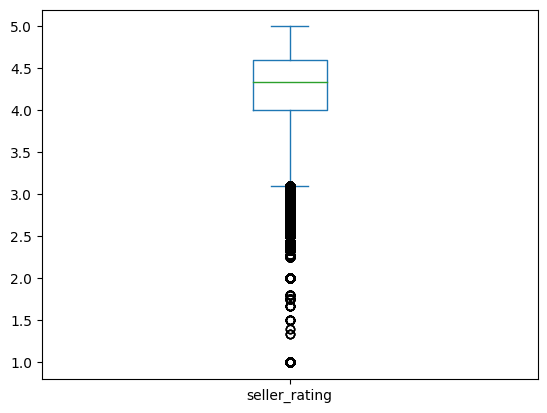

In [227]:
df_train['seller_rating'].plot(kind='box')

The seller rating refers to the rating of the dealer who is selling the vehicle. We can see that the seller rating is right-skewed. This is because there are a lot of dealers with a high rating. However, there are some missing values in this column. As there are no other columns related to the dealer, we cannot impute the missing values. So, we will follow the previous approach and convert the seller rating to a categorical variable. We will use the following bins: 0-1, 1-2, 2-3, 3-4, 4-5. After that, we will replace the null values with another new category 'unknown'.

In [228]:
df_train['seller_rating'] = pd.cut(df_train['seller_rating'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True, labels=['1 star', '2 star', '3 star', '4 star', '5 star'])

In [229]:
df_train['seller_rating'] = df_train['seller_rating'].cat.add_categories('unknown')
df_train['seller_rating'].fillna('unknown', inplace=True)

In [230]:
# checking for the total amount of null values as a percentage.
percentage = df_train['seller_rating'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the seller_rating column is {percentage.round(2)}%.")

The amount of null values in the seller_rating column is 0.0%.


In [231]:
df_test['seller_rating'] = pd.cut(df_test['seller_rating'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True, labels=['1 star', '2 star', '3 star', '4 star', '5 star'])

In [232]:
df_test['seller_rating'] = df_test['seller_rating'].cat.add_categories('unknown')
df_test['seller_rating'].fillna('unknown', inplace=True)

In [233]:
df_val['seller_rating'] = pd.cut(df_val['seller_rating'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True, labels=['1 star', '2 star', '3 star', '4 star', '5 star'])
df_val['seller_rating'] = df_val['seller_rating'].cat.add_categories('unknown')
df_val['seller_rating'].fillna('unknown', inplace=True)

In [234]:
# checking for the total amount of null values as a percentage.
percentage = df_test['seller_rating'].isna().sum() / df_test.shape[0] * 100

print(f"The amount of null values in the seller_rating column is {percentage.round(2)}%.")

The amount of null values in the seller_rating column is 0.0%.


## torque

In [235]:
# checking for the total amount of null values as a percentage.
percentage = df_train['torque (rpm)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the torque column is {percentage.round(2)}%.")

The amount of null values in the torque column is 15.69%.


<Axes: >

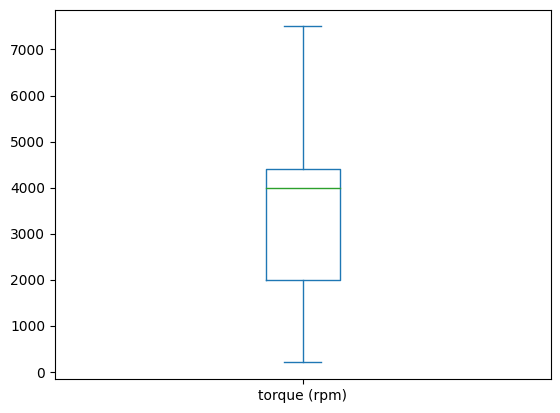

In [236]:
df_train['torque (rpm)'].plot(kind='box')

In [237]:
df_train.corr()['torque (rpm)']

back_legroom (in)            0.087103
city_fuel_economy           -0.160524
daysonmarket                -0.037788
num_of_cylinders             0.213969
front_legroom (in)           0.230426
fuel_tank_volume (gallon)    0.112384
height (in)                  0.093067
highway_fuel_economy        -0.116504
horsepower                   0.082445
length (in)                  0.131213
major_options_count         -0.084425
maximum_seating              0.121045
torque (rpm)                 1.000000
wheelbase (in)               0.090473
width (in)                   0.048485
year                        -0.124858
actual_price                -0.141727
volume                       0.118402
Name: torque (rpm), dtype: float64

In [238]:
median_torque_by_model = df_train.groupby('model_name')['torque (rpm)'].median()
df_train['torque (rpm)'] = df_train.apply(lambda x: fill(x, 'torque (rpm)', ['model_name'], median_torque_by_model), axis=1)
df_test['torque (rpm)'] = df_test.apply(lambda x: fill(x, 'torque (rpm)', ['model_name'], median_torque_by_model), axis=1)
df_val['torque (rpm)'] = df_val.apply(lambda x: fill(x, 'torque (rpm)', ['model_name'], median_torque_by_model), axis=1)

In [239]:
# checking for the total amount of null values as a percentage.
percentage = df_train['torque (rpm)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the torque column is {percentage.round(2)}%.")

The amount of null values in the torque column is 4.17%.


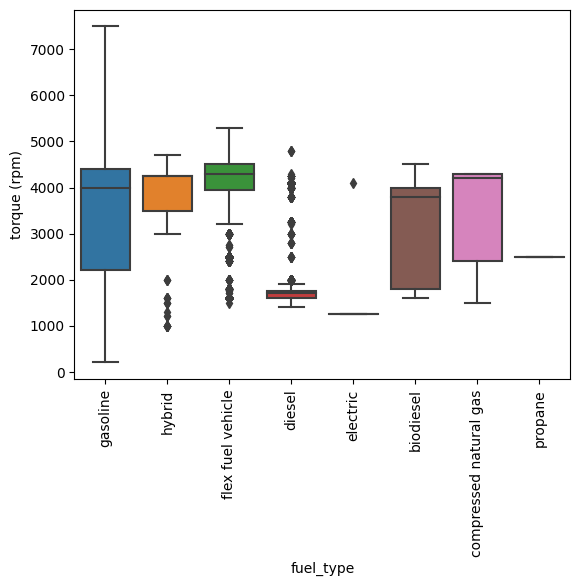

In [240]:
ax = sns.boxplot(x='fuel_type', y='torque (rpm)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

As we can observe, the torque is missing for many electric vehicles. They are missing not at random. Usually, the electric car can acheive instant torque of 10000-15000 rpm, which is far higher than the other vehicles. Here, we will use artribatray value imputation to fill the missing values

In [241]:
df_train.loc[df_train['fuel_type'] == 'electric', 'torque (rpm)'] = -1
df_test.loc[df_test['fuel_type'] == 'electric', 'torque (rpm)'] = -1
df_val.loc[df_val['fuel_type'] == 'electric', 'torque (rpm)'] = -1

In [242]:
groups = df_train[(df_train['torque (rpm)'].notnull()) & (df_train['fuel_type'] != 'electric')].groupby('fuel_type')['torque (rpm)'].apply(list)
f_stat, p_val = stats.f_oneway(*groups)
print(p_val)
if p_val < 0.05:
  print("The torque values are significantly different for different fuel types")
else:
  print("No difference by fuel_type")

0.0
The torque values are significantly different for different fuel types


In [243]:
groups

fuel_type
biodiesel                 [1800.0, 1800.0, 3950.0, 4000.0, 4000.0, 3950....
compressed natural gas    [3200.0, 4200.0, 4200.0, 4300.0, 1600.0, 4300....
diesel                    [1700.0, 1700.0, 1600.0, 1700.0, 1750.0, 4000....
flex fuel vehicle         [3950.0, 4500.0, 4100.0, 3800.0, 4400.0, 4500....
gasoline                  [4400.0, 4500.0, 1800.0, 1450.0, 4100.0, 4100....
hybrid                    [4700.0, 4250.0, 3500.0, 4250.0, 4250.0, 4250....
propane                                                            [2500.0]
Name: torque (rpm), dtype: object

In [244]:
type(groups)

pandas.core.series.Series

In [245]:
groups.drop('propane', inplace=True)

In [246]:
m_comp = stats.tukey_hsd(*groups)
print(m_comp)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -424.012     0.865 -1484.475   636.450
 (0 - 2)   1028.254     0.000   941.213  1115.296
 (0 - 3)  -1128.253     0.000 -1203.734 -1052.772
 (0 - 4)   -435.496     0.000  -503.439  -367.553
 (0 - 5)   -960.230     0.000 -1090.314  -830.146
 (1 - 0)    424.012     0.865  -636.450  1484.475
 (1 - 2)   1452.267     0.001   392.537  2511.997
 (1 - 3)   -704.241     0.405 -1763.084   354.602
 (1 - 4)    -11.484     1.000 -1069.816  1046.849
 (1 - 5)   -536.218     0.705 -1600.348   527.913
 (2 - 0)  -1028.254     0.000 -1115.296  -941.213
 (2 - 1)  -1452.267     0.001 -2511.997  -392.537
 (2 - 3)  -2156.508     0.000 -2220.883 -2092.132
 (2 - 4)  -1463.751     0.000 -1519.096 -1408.405
 (2 - 5)  -1988.484     0.000 -2112.455 -1864.513
 (3 - 0)   1128.253     0.000  1052.772  1203.734
 (3 - 1)    704.241     0.405  -354.602  1763.084
 (3 - 2)   2156.508     0.000  2

In [247]:
median_torque_by_fuel = df_train.groupby('fuel_type')['torque (rpm)'].median()
df_train['torque (rpm)'] = df_train.apply(lambda x: fill(x, 'torque (rpm)', ['fuel_type'], median_torque_by_fuel), axis=1)
df_test['torque (rpm)'] = df_test.apply(lambda x: fill(x, 'torque (rpm)', ['fuel_type'], median_torque_by_fuel), axis=1)
df_val['torque (rpm)'] = df_val.apply(lambda x: fill(x, 'torque (rpm)', ['fuel_type'], median_torque_by_fuel), axis=1)

In [248]:
df_train['torque (rpm)'].isnull().sum()

1

In [249]:
median_torque = df_train['torque (rpm)'].median()
df_train['torque (rpm)'].fillna(median_torque, inplace=True)
df_test['torque (rpm)'].fillna(median_torque, inplace=True)
df_val['torque (rpm)'].fillna(median_torque, inplace=True)

In [250]:
# checking for the total amount of null values as a percentage.
percentage = df_train['torque (rpm)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the torque column is {percentage.round(2)}%.")

The amount of null values in the torque column is 0.0%.


In [251]:
df_train['torque (rpm)'].isnull().sum()

0

## wheelbase (in)

In [252]:
# checking for the total amount of null values as a percentage.
percentage = df_train['wheelbase (in)'].isna().sum() / df_train.shape[0] * 100

print(f"The amount of null values in the wheelbase columns is {percentage.round(2)}%.")

The amount of null values in the wheelbase columns is 2.83%.


<Axes: >

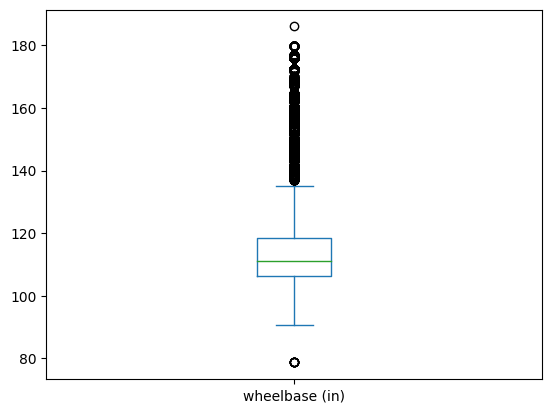

In [253]:
df_train['wheelbase (in)'].plot(kind='box')

In [254]:
df_train.loc[df_train['wheelbase (in)'] < 80, ['make_name', 'model_name', 'body_type', 'wheelbase (in)']]

,make_name,model_name,body_type,wheelbase (in)
54,scion,iq,hatchback,78.7
40208,scion,iq,hatchback,78.7
53868,scion,iq,hatchback,78.7
69892,scion,iq,hatchback,78.7
133926,scion,iq,hatchback,78.7
136111,scion,iq,hatchback,78.7
162663,scion,iq,hatchback,78.7
223082,scion,iq,hatchback,78.7


This data is legit. Thus these values are not outliers.

In [255]:
df_train.loc[df_train['wheelbase (in)'] > 140, ['make_name', 'model_name', 'body_type', 'wheelbase (in)']]

,make_name,model_name,body_type,wheelbase (in)
5,chevrolet,silverado 1500,pickup truck,147.5
11,chevrolet,silverado 1500,pickup truck,147.5
12,ram,2500,pickup truck,149.5
13,ram,1500,pickup truck,140.5
36,chevrolet,silverado 3500hd chassis,pickup truck,176.8
...,...,...,...,...
271157,chevrolet,silverado 1500,pickup truck,143.5
271162,ford,f-150,pickup truck,145.0
271175,gmc,sierra 2500hd,pickup truck,158.9
271205,ram,1500,pickup truck,140.5


In [256]:
df_train.loc[df_train['wheelbase (in)'] > 140, 'body_type'].value_counts()

pickup truck    35823
van               298
sedan               3
Name: body_type, dtype: int64

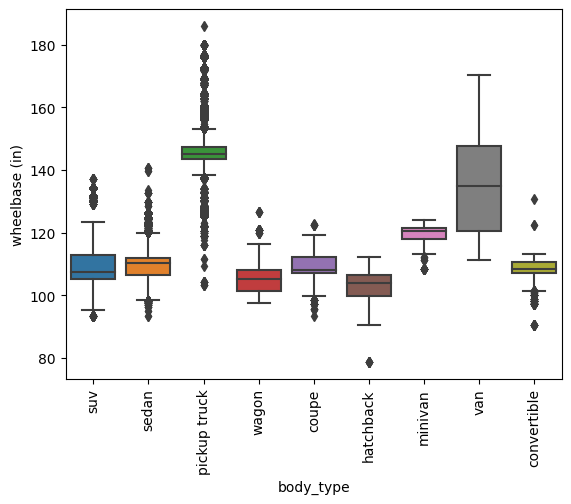

In [257]:
ax = sns.boxplot(x='body_type', y='wheelbase (in)', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It is clear from the boxplot that the wheelbase of the pickup trucks are higher than the other body types. The wheelbase of these vehicles appear as outliers in the combined boxplot. But they are not actually outliers.

In [258]:
median_wheelbase_by_model = df_train.groupby('model_name')['wheelbase (in)'].median()
median_wheelbase_by_body = df_train.groupby('body_type')['wheelbase (in)'].median()

In [259]:
df_train['wheelbase (in)'] = df_train.apply(lambda x: fill(x, 'wheelbase (in)', ['model_name'], median_wheelbase_by_model), axis=1)
df_test['wheelbase (in)'] = df_test.apply(lambda x: fill(x, 'wheelbase (in)', ['model_name'], median_wheelbase_by_model), axis=1)
df_val['wheelbase (in)'] = df_val.apply(lambda x: fill(x, 'wheelbase (in)', ['model_name'], median_wheelbase_by_model), axis=1)

In [260]:
df_train['wheelbase (in)'].isnull().sum()

2280

In [261]:
df_train['wheelbase (in)'] = df_train.apply(lambda x: fill(x, 'wheelbase (in)', ['body_type'], median_wheelbase_by_body), axis=1)
df_test['wheelbase (in)'] = df_test.apply(lambda x: fill(x, 'wheelbase (in)', ['body_type'], median_wheelbase_by_body), axis=1)
df_val['wheelbase (in)'] = df_val.apply(lambda x: fill(x, 'wheelbase (in)', ['body_type'], median_wheelbase_by_body), axis=1)

In [262]:
df_train['wheelbase (in)'].isnull().sum()

0

In [263]:
median_wheelbase = df_train['wheelbase (in)'].median()
df_train['wheelbase (in)'].fillna(median_wheelbase, inplace=True)
df_test['wheelbase (in)'].fillna(median_wheelbase, inplace=True)
df_val['wheelbase (in)'].fillna(median_wheelbase, inplace=True)

## Feature engineering of categorical columns

In [264]:
categorical_cols

Index(['body_type', 'exterior_color_grouped', 'fuel_type',
       'interior_color_grouped', 'make_name', 'model_name', 'transmission',
       'wheel_system', 'year'],
      dtype='object')

In [265]:
df_train[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271232 entries, 0 to 271231
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   body_type               271226 non-null  object
 1   exterior_color_grouped  271232 non-null  object
 2   fuel_type               268865 non-null  object
 3   interior_color_grouped  271232 non-null  object
 4   make_name               271232 non-null  object
 5   model_name              271232 non-null  object
 6   transmission            268318 non-null  object
 7   wheel_system            264323 non-null  object
 8   year                    271232 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 18.6+ MB


In [266]:
def fill_category(row, col, by, filler):
    if pd.isnull(row[col]):
        try:
          idx = [row[i] for i in by]
          return filler[tuple(idx)] if len(idx) > 1 else filler[row[by[0]]]
        except KeyError:
          return 'unknown'
    else:
        return row[col]

In [267]:
mode_body_by_model = df_train.groupby('model_name')['body_type'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown')

In [268]:
df_train['body_type'] = df_train.apply(lambda x: fill_category(x, 'body_type', ['model_name'], mode_body_by_model), axis=1)
df_test['body_type'] = df_test.apply(lambda x: fill_category(x, 'body_type', ['model_name'], mode_body_by_model), axis=1)
df_val['body_type'] = df_val.apply(lambda x: fill_category(x, 'body_type', ['model_name'], mode_body_by_model), axis=1)

In [269]:
mode_fuel_by_model = df_train.groupby('model_name')['fuel_type'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown')
df_train['fuel_type'] = df_train.apply(lambda x: fill_category(x, 'fuel_type', ['model_name'], mode_fuel_by_model), axis=1)
df_test['fuel_type'] = df_test.apply(lambda x: fill_category(x, 'fuel_type', ['model_name'], mode_fuel_by_model), axis=1)
df_val['fuel_type'] = df_val.apply(lambda x: fill_category(x, 'fuel_type', ['model_name'], mode_fuel_by_model), axis=1)

In [270]:
mode_transmission_by_model = df_train.groupby('model_name')['transmission'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown')
df_train['transmission'] = df_train.apply(lambda x: fill_category(x, 'transmission', ['model_name'], mode_transmission_by_model), axis=1)
df_test['transmission'] = df_test.apply(lambda x: fill_category(x, 'transmission', ['model_name'], mode_transmission_by_model), axis=1)
df_val['transmission'] = df_val.apply(lambda x: fill_category(x, 'transmission', ['model_name'], mode_transmission_by_model), axis=1)

In [271]:
mode_wheel_by_model = df_train.groupby('model_name')['wheel_system'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown')
df_train['wheel_system'] = df_train.apply(lambda x: fill_category(x, 'wheel_system', ['model_name'], mode_wheel_by_model), axis=1)
df_test['wheel_system'] = df_test.apply(lambda x: fill_category(x, 'wheel_system', ['model_name'], mode_wheel_by_model), axis=1)
df_val['wheel_system'] = df_val.apply(lambda x: fill_category(x, 'wheel_system', ['model_name'], mode_wheel_by_model), axis=1)

In [272]:
df_train[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271232 entries, 0 to 271231
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   body_type               271232 non-null  object
 1   exterior_color_grouped  271232 non-null  object
 2   fuel_type               271232 non-null  object
 3   interior_color_grouped  271232 non-null  object
 4   make_name               271232 non-null  object
 5   model_name              271232 non-null  object
 6   transmission            271232 non-null  object
 7   wheel_system            271232 non-null  object
 8   year                    271232 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 18.6+ MB


## Categorical variable treatment

Now we will check if there are any categorical variables with too many categories. If possible, we can combine unfrequent categories into a new category 'other'.

In [273]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271232 entries, 0 to 271231
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   vin                        271232 non-null  object  
 1   back_legroom (in)          271232 non-null  float64 
 2   body_type                  271232 non-null  object  
 3   city_fuel_economy          271232 non-null  float64 
 4   daysonmarket               271232 non-null  int64   
 5   dealer_zip                 271232 non-null  object  
 6   num_of_cylinders           271232 non-null  float64 
 7   exterior_color_grouped     271232 non-null  object  
 8   front_legroom (in)         271232 non-null  float64 
 9   fuel_tank_volume (gallon)  271232 non-null  float64 
 10  fuel_type                  271232 non-null  object  
 11  height (in)                271232 non-null  float64 
 12  highway_fuel_economy       271232 non-null  float64 
 13  horsepower    

In [274]:
df_train['exterior_color_grouped'].nunique()

13

In [275]:
df_train['exterior_color_grouped'].value_counts()

white     71667
black     68048
silver    42113
blue      29606
red       27094
gray      25666
green      2525
orange     1394
brown      1211
gold        893
beige       474
yellow      442
purple       99
Name: exterior_color_grouped, dtype: int64

In [276]:
df_train['exterior_color_grouped'] = np.where(df_train['exterior_color_grouped'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red']), df_train['exterior_color_grouped'], 'other')

In [277]:
df_train['exterior_color_grouped'].value_counts()

white     71667
black     68048
silver    42113
blue      29606
red       27094
gray      25666
other      7038
Name: exterior_color_grouped, dtype: int64

In [278]:
df_train['interior_color_grouped'].nunique()

13

In [279]:
df_train['interior_color_grouped'].value_counts()

black     190640
gray       41161
brown      16165
white      11881
red         4140
silver      3490
blue        3109
gold         177
green        174
beige        163
orange       108
purple        14
yellow        10
Name: interior_color_grouped, dtype: int64

In [280]:
df_train['interior_color_grouped'] = np.where(df_train['interior_color_grouped'].isin(['black', 'gray', 'white', 'brown']), df_train['interior_color_grouped'], 'other')

In [281]:
df_train['interior_color_grouped'].value_counts()

black    190640
gray      41161
brown     16165
white     11881
other     11385
Name: interior_color_grouped, dtype: int64

In [282]:
df_test['exterior_color_grouped'] = np.where(df_test['exterior_color_grouped'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red']), df_test['exterior_color_grouped'], 'other')
df_test['interior_color_grouped'] = np.where(df_test['interior_color_grouped'].isin(['black', 'gray', 'white', 'brown']), df_test['interior_color_grouped'], 'other')

In [283]:
df_val['exterior_color_grouped'] = np.where(df_val['exterior_color_grouped'].isin(['black', 'white', 'silver', 'gray', 'blue', 'red']), df_val['exterior_color_grouped'], 'other')
df_val['interior_color_grouped'] = np.where(df_val['interior_color_grouped'].isin(['black', 'gray', 'white', 'brown']), df_val['interior_color_grouped'], 'other')

In [284]:
df_train['fuel_type'].value_counts()

gasoline                  244042
flex fuel vehicle          11104
hybrid                      6825
diesel                      4185
biodiesel                   3021
electric                    2043
compressed natural gas        11
propane                        1
Name: fuel_type, dtype: int64

In [285]:
df_train['fuel_type'] = np.where(~df_train['fuel_type'].isin(['unknown', 'compressed natural gas', 'propane']), df_train['fuel_type'], 'other')

In [286]:
df_train['fuel_type'].value_counts()

gasoline             244042
flex fuel vehicle     11104
hybrid                 6825
diesel                 4185
biodiesel              3021
electric               2043
other                    12
Name: fuel_type, dtype: int64

In [287]:
df_test['fuel_type'] = np.where(~df_test['fuel_type'].isin(['unknown', 'compressed natural gas', 'propane']), df_test['fuel_type'], 'other')
df_val['fuel_type'] = np.where(~df_val['fuel_type'].isin(['unknown', 'compressed natural gas', 'propane']), df_val['fuel_type'], 'other')

In [288]:
df_train['num_of_cylinders'].value_counts()

4.0     154463
6.0      73856
8.0      34466
3.0       5846
0.0       2043
5.0        431
12.0        75
10.0        40
2.0         12
Name: num_of_cylinders, dtype: int64

In [289]:
df_train['transmission'].value_counts()

automatic      221446
cvt             44146
manual           4425
dual clutch      1215
Name: transmission, dtype: int64

In [290]:
df_train['make_name'].nunique()

56

In [291]:
top_20_make = df_train['make_name'].value_counts(sort=True).index[:20].tolist()

In [292]:
df_train['make_name'] = np.where(df_train['make_name'].isin(top_20_make), df_train['make_name'], 'other')

In [293]:
df_train['make_name'].nunique()

21

In [294]:
df_test['make_name'] = np.where(df_test['make_name'].isin(top_20_make), df_test['make_name'], 'other')
df_val['make_name'] = np.where(df_val['make_name'].isin(top_20_make), df_val['make_name'], 'other')

In [295]:
df_train['year'] = df_train['year'].astype('int')
df_test['year'] = df_test['year'].astype('int')
df_val['year'] = df_val['year'].astype('int')

## Feature drop

In [296]:
df_train.columns

Index(['vin', 'back_legroom (in)', 'body_type', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'num_of_cylinders',
       'exterior_color_grouped', 'front_legroom (in)',
       'fuel_tank_volume (gallon)', 'fuel_type', 'height (in)',
       'highway_fuel_economy', 'horsepower', 'interior_color_grouped',
       'length (in)', 'major_options_count', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'seller_rating', 'torque (rpm)',
       'transmission', 'wheel_system', 'wheelbase (in)', 'width (in)', 'year',
       'actual_price', 'dealer_state', 'dealer_region', 'volume'],
      dtype='object')

During bi-variate analysis, we have found that a lot of categorical features are highly correlated with 'model_name'. Moreover, the 'model_name' column is highly correlaated to the target variable. Including this varibale in the model may make the algorithm memorize the price for a specific car model. As a result, when a new model name appears in the test data, the model may peform poorly. That's why, we will drop this column alongwith other irrelevant columns

In [297]:
cols_to_drop = ['daysonmarket', 'dealer_zip', 'major_options_count', 'model_name', 'dealer_state', 'length (in)', 'width (in)', 'height (in)']

In [298]:
df_train['combined_fuel_economy'] = df_train['city_fuel_economy'] + df_train['highway_fuel_economy']
df_test['combined_fuel_economy'] = df_test['city_fuel_economy'] + df_test['highway_fuel_economy']
df_val['combined_fuel_economy'] = df_val['city_fuel_economy'] + df_val['highway_fuel_economy']

In [299]:
cols_to_drop.append('city_fuel_economy')
cols_to_drop.append('highway_fuel_economy')

In [300]:
df_train.drop(cols_to_drop, axis=1, inplace=True)
df_test.drop(cols_to_drop, axis=1, inplace=True)
df_val.drop(cols_to_drop, axis=1, inplace=True)

In [301]:
df_train.set_index('vin', drop=True, inplace=True)
df_test.set_index('vin', drop=True, inplace=True)
df_val.set_index('vin', drop=True, inplace=True)

In [302]:
df_train.shape

(271232, 22)

In [303]:
df_test.shape

(84761, 22)

In [304]:
df_val.shape

(67809, 22)

In [305]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271232 entries, JTEZU5JR8L5224867 to WBA8E1G59HNU12604
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   back_legroom (in)          271232 non-null  float64 
 1   body_type                  271232 non-null  object  
 2   num_of_cylinders           271232 non-null  float64 
 3   exterior_color_grouped     271232 non-null  object  
 4   front_legroom (in)         271232 non-null  float64 
 5   fuel_tank_volume (gallon)  271232 non-null  float64 
 6   fuel_type                  271232 non-null  object  
 7   horsepower                 271232 non-null  float64 
 8   interior_color_grouped     271232 non-null  object  
 9   make_name                  271232 non-null  object  
 10  maximum_seating            271232 non-null  float64 
 11  mileage                    271232 non-null  category
 12  seller_rating              271232 non-null  catego

In [306]:
df_train.head()

,back_legroom (in),body_type,num_of_cylinders,exterior_color_grouped,front_legroom (in),fuel_tank_volume (gallon),fuel_type,horsepower,interior_color_grouped,make_name,...,seller_rating,torque (rpm),transmission,wheel_system,wheelbase (in),year,actual_price,dealer_region,volume,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,
JTEZU5JR8L5224867,32.9,suv,6.0,blue,41.7,23.0,gasoline,270.0,black,toyota,...,5 star,4400.0,automatic,4x2,109.8,2020,43497.0,South,337.5,35.000000
19UUB2F47LA006167,34.5,sedan,6.0,white,42.6,17.2,gasoline,290.0,white,other,...,5 star,4500.0,automatic,fwd,109.3,2020,41125.0,South,320.7,51.000000
WBA5U7C08LA232243,35.2,sedan,6.0,white,42.0,15.6,gasoline,382.0,black,bmw,...,5 star,1800.0,automatic,rwd,112.2,2020,49260.0,South,323.5,52.000000
WBA5R1C57KAK11439,35.2,sedan,4.0,silver,42.0,15.6,gasoline,255.0,black,bmw,...,5 star,1450.0,automatic,rwd,112.2,2019,37204.0,West,323.9,62.000000
JF2SJAGC1JH590936,38.0,suv,4.0,silver,43.0,15.9,gasoline,170.0,black,subaru,...,3 star,4100.0,cvt,awd,103.9,2018,25411.0,Northeast,330.2,58.164986


## Save the cleaned data

In [307]:
df_train.to_csv('train_cleaned.csv', index=True)
df_test.to_csv('test_cleaned.csv', index=True)
df_val.to_csv('validation_cleaned.csv', index=True)